In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Tilburg account
neck_data = pd.read_csv("/content/drive/MyDrive/Thesis/Kopie van segmented_data_Neck_1file.csv")
back_data = pd.read_csv("/content/drive/MyDrive/Thesis/Kopie van segmented_data_back_1file.csv")

In [ ]:
#Personal account
neck_data = pd.read_csv("/content/drive/MyDrive/Thesis (1)/Kopie van segmented_data_Neck_1file.csv")
back_data = pd.read_csv("/content/drive/MyDrive/Thesis (1)/Kopie van segmented_data_back_1file.csv")

In [ ]:
#Jupiterlab
neck_data = pd.read_csv("THESIS/DATA/Kopie van segmented_data_Neck_1file.csv")
back_data = pd.read_csv("THESIS/DATA/Kopie van segmented_data_back_1file.csv")

In [ ]:
# Neck Data
print(neck_data.shape)
neck_data.head(5)

(106020, 55)


,ID,mean_ANeck_x,mean_ANeck_y,mean_ANeck_z,mean_GNeck_x,mean_GNeck_y,mean_GNeck_z,positional_offset_ANeck,positional_offset_GNeck,sum_std_dev_ANeck,...,ecdf_GNeck_y_5,ecdf_GNeck_y_6,ecdf_GNeck_y_7,ecdf_GNeck_z_1,ecdf_GNeck_z_2,ecdf_GNeck_z_3,ecdf_GNeck_z_4,ecdf_GNeck_z_5,ecdf_GNeck_z_6,ecdf_GNeck_z_7
0,281,-0.236118,-0.400642,-0.888355,0.284424,0.029297,-0.442200,0.362060,0.557523,0.080441,...,2.197266,3.540039,5.249024,-5.004883,-3.112793,-1.159668,0.305176,1.220703,2.258301,3.173828
1,281,-0.217349,-0.428345,-0.876187,1.063232,1.508484,-0.939026,0.336417,2.251249,0.069814,...,2.319336,3.295899,4.699707,-4.699707,-3.112793,-2.197266,-0.854492,0.122070,1.464844,2.807617
2,281,-0.185649,-0.444873,-0.880181,-0.186768,0.749207,-1.699524,0.333955,1.948379,0.067302,...,1.281738,2.075195,2.990723,-4.455567,-3.417969,-2.563477,-1.708984,-0.671387,-0.183105,0.732422
3,281,-0.172847,-0.453025,-0.878718,-0.473633,-0.438232,-1.058350,0.330724,1.123430,0.059198,...,0.061035,0.793457,1.831055,-3.723145,-2.624512,-1.831055,-0.915527,-0.244141,0.244141,1.525879
4,281,-0.178704,-0.462275,-0.871917,0.176392,-0.633240,0.025940,0.319235,0.388181,0.062956,...,0.183105,0.915527,1.953125,-2.563477,-1.892090,-0.793457,0.183105,0.793457,1.647949,2.746582


In [ ]:
# Back Data
print(back_data.shape)
back_data.head(5)

(106020, 58)


,ID,mean_ABack_x,mean_ABack_y,mean_ABack_z,mean_GBack_x,mean_GBack_y,mean_GBack_z,positional_offset_ABack,positional_offset_GBack,sum_std_dev_ABack,...,ecdf_GBack_z_1,ecdf_GBack_z_2,ecdf_GBack_z_3,ecdf_GBack_z_4,ecdf_GBack_z_5,ecdf_GBack_z_6,ecdf_GBack_z_7,dominant_behavior_1,dominant_behavior_2,dominant_behavior_3
0,291,-0.099065,0.940439,0.361450,13.816224,-2.485962,1.141052,1.320512,14.257560,2.997425,...,-49.682620,-28.259279,-5.920411,1.953125,14.892579,39.001467,109.130866,Synchronization,<undefined>,<undefined>
1,291,-0.146030,0.887405,0.294480,-6.087342,-1.693421,0.013428,1.311881,5.911295,3.110186,...,-47.790530,-32.165529,-10.681153,-1.342774,17.456056,66.345219,132.873543,Synchronization,<undefined>,<undefined>
2,291,-0.055327,0.886487,0.263025,-5.803223,-2.344666,-3.237305,1.315812,6.745695,1.952549,...,-31.616213,-7.019043,-3.295899,-1.342774,-0.366211,0.854492,7.019043,<undefined>,<undefined>,<undefined>
3,291,0.006099,0.945522,0.234272,0.197449,-1.891480,0.111389,1.377195,1.395059,0.041543,...,-2.868653,-1.220703,-0.427246,-0.061035,0.549316,1.892090,2.990723,<undefined>,<undefined>,<undefined>
4,291,0.014619,0.945376,0.232549,0.157471,-1.537171,0.805054,1.377644,1.200137,0.036896,...,-0.976563,-0.244141,0.122070,0.488281,1.159668,1.953125,2.990723,<undefined>,<undefined>,<undefined>


In [ ]:
# concatenate data
df_complete = pd.concat([neck_data, back_data], axis=1)

#remove duplicated columns
df_complete = df_complete.loc[:, ~df_complete.columns.duplicated()]

#Split ID into dog_ID and test_nr
df_complete['test_nr'] = df_complete['ID'] %10
df_complete['Dog_ID'] = df_complete['ID'] //10

df_complete.head(5)

,ID,mean_ANeck_x,mean_ANeck_y,mean_ANeck_z,mean_GNeck_x,mean_GNeck_y,mean_GNeck_z,positional_offset_ANeck,positional_offset_GNeck,sum_std_dev_ANeck,...,ecdf_GBack_z_3,ecdf_GBack_z_4,ecdf_GBack_z_5,ecdf_GBack_z_6,ecdf_GBack_z_7,dominant_behavior_1,dominant_behavior_2,dominant_behavior_3,test_nr,Dog_ID
0,281,-0.236118,-0.400642,-0.888355,0.284424,0.029297,-0.442200,0.362060,0.557523,0.080441,...,-5.920411,1.953125,14.892579,39.001467,109.130866,Synchronization,<undefined>,<undefined>,1,28
1,281,-0.217349,-0.428345,-0.876187,1.063232,1.508484,-0.939026,0.336417,2.251249,0.069814,...,-10.681153,-1.342774,17.456056,66.345219,132.873543,Synchronization,<undefined>,<undefined>,1,28
2,281,-0.185649,-0.444873,-0.880181,-0.186768,0.749207,-1.699524,0.333955,1.948379,0.067302,...,-3.295899,-1.342774,-0.366211,0.854492,7.019043,<undefined>,<undefined>,<undefined>,1,28
3,281,-0.172847,-0.453025,-0.878718,-0.473633,-0.438232,-1.058350,0.330724,1.123430,0.059198,...,-0.427246,-0.061035,0.549316,1.892090,2.990723,<undefined>,<undefined>,<undefined>,1,28
4,281,-0.178704,-0.462275,-0.871917,0.176392,-0.633240,0.025940,0.319235,0.388181,0.062956,...,0.122070,0.488281,1.159668,1.953125,2.990723,<undefined>,<undefined>,<undefined>,1,28


In [ ]:
# clean data
# Remove instances that contain "synchronization" or "Extra_synchronization"
df_cleaned = df_complete[df_complete["dominant_behavior_1"] != "Synchronization"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_2"] != "Synchronization"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_3"] != "Synchronization"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_1"] != "Extra_Synchronization"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_2"] != "Extra_Synchronization"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_3"] != "Extra_Synchronization"]
print(df_cleaned.shape)

#remove instances in which all three dominant-behaviors = equal to "<undefined>"
mask = (df_cleaned[["dominant_behavior_1", "dominant_behavior_2", "dominant_behavior_3"]] == "<undefined>").all(axis=1)
df_cleaned = df_cleaned[~mask]
print(df_cleaned.shape)

(105885, 114)
(70035, 114)


In [ ]:
#The Bowing label is removed due to its low amount of occurences
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_1"] != "Bowing"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_2"] != "Bowing"]
df_cleaned = df_cleaned[df_cleaned["dominant_behavior_3"] != "Bowing"]

In [ ]:
# one hot encode the three label features
unique_labels = pd.unique(df_cleaned[["dominant_behavior_1", "dominant_behavior_2", "dominant_behavior_3"]].values.ravel())

for label in unique_labels:
    df_cleaned[label] = np.where((df_cleaned["dominant_behavior_1"] == label) | (df_cleaned["dominant_behavior_2"] == label) | (df_cleaned["dominant_behavior_3"] == label), 1, 0)


In [ ]:
# Remove the Undefined label feature
df_cleaned = df_cleaned.drop("<undefined>", axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70020 entries, 87 to 106019
Columns: 130 entries, ID to Drinking
dtypes: float64(104), int32(16), int64(7), object(3)
memory usage: 65.7+ MB


In [ ]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Split the data in trainings, validation and test data
# Iterative_train_test_split is used to split the data evenly based on all of the targets variables and Dog_ID
from skmultilearn.model_selection import iterative_train_test_split

X = df_cleaned.drop(["Dog_ID", "test_nr", "Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking", "dominant_behavior_1", "dominant_behavior_2", "dominant_behavior_3"], axis=1)
y = df_cleaned[["Dog_ID", "Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]]

# Convert X and y to arrays as input for the iterative_train_test_split
X_array = X.to_numpy()
y_array = y.to_numpy()

# Split the data in training and test sets
X_train, y_train, X_test, y_test = iterative_train_test_split(X_array, y_array, test_size=0.2)
# Split the data in training and validation sets
X_train, y_train, X_val , y_val = iterative_train_test_split(X_train, y_train, test_size=0.2)

# The iterative_train_test_split is from the papers of Sechidis, Tsoumakas, and Vlahavas (2011) and Szymański and Kajdanowicz (2017)

In [ ]:
# Print shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(44813, 109)
(44813, 17)
(14004, 109)
(14004, 17)
(11203, 109)
(11203, 17)


In [ ]:
# Print label distribution in y
print(y.sum())

Dog_ID             3063497
Shaking                418
Trotting              7827
Walking               8022
Sitting              11248
Eating                3185
Standing             10339
Galloping             1724
Carrying object       1413
Tugging               3003
Sniffing             10295
Playing               9421
Lying chest          11321
Jumping                244
Panting              17974
Pacing                 808
Drinking               639
dtype: int64


In [ ]:
#Convert the arrays the dataframes
X_train = pd.DataFrame(X_train, columns=["ID", "mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])
X_test = pd.DataFrame(X_test, columns=["ID", "mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])
X_val = pd.DataFrame(X_val, columns=["ID", "mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])

y_train = pd.DataFrame(y_train, columns=["Dog_ID", "Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"])
y_test = pd.DataFrame(y_test, columns=["Dog_ID", "Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"])
y_val = pd.DataFrame(y_val, columns=["Dog_ID", "Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"])

#Drop Dog_ID, this column was only needed for splitting the data
y_train = y_train.drop("Dog_ID", axis=1)
y_test = y_test.drop("Dog_ID", axis=1)
y_val = y_val.drop("Dog_ID", axis=1)
X_train = X_train.drop("ID", axis=1)
X_test = X_test.drop("ID", axis=1)
X_val = X_val.drop("ID", axis=1)

In [ ]:
#Print label distribution of y_train, y_val and y_test
print("y_train")
print(y_train.sum(axis=0))
print("y_test")
print(y_test.sum(axis=0))
print("y_val")
print(y_val.sum(axis=0))

y_train
Shaking              267
Trotting            5010
Walking             5134
Sitting             7198
Eating              2038
Standing            6617
Galloping           1114
Carrying object      923
Tugging             1960
Sniffing            6589
Playing             6030
Lying chest         7246
Jumping              166
Panting            11716
Pacing               517
Drinking             496
dtype: int64
y_test
Shaking              84
Trotting           1565
Walking            1604
Sitting            2250
Eating              637
Standing           2068
Galloping           345
Carrying object     283
Tugging             560
Sniffing           2059
Playing            1884
Lying chest        2264
Jumping              49
Panting            3595
Pacing              162
Drinking             53
dtype: int64
y_val
Shaking              67
Trotting           1252
Walking            1284
Sitting            1800
Eating              510
Standing           1654
Galloping           265
C

In [ ]:
# Scale the data based on Z-score
from sklearn.preprocessing import StandardScaler

Z_scaler = StandardScaler()
# Fit and Transform the training_data using the scaler
X_train = Z_scaler.fit_transform(X_train)
# Transform the test_data and validation_data using the scaler
X_test = Z_scaler.transform(X_test)
X_val = Z_scaler.transform(X_val)

X_train = pd.DataFrame(X_train, columns=["mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])
X_test = pd.DataFrame(X_test, columns=["mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])
X_val = pd.DataFrame(X_val, columns=["mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])

(1.0, 10.0)

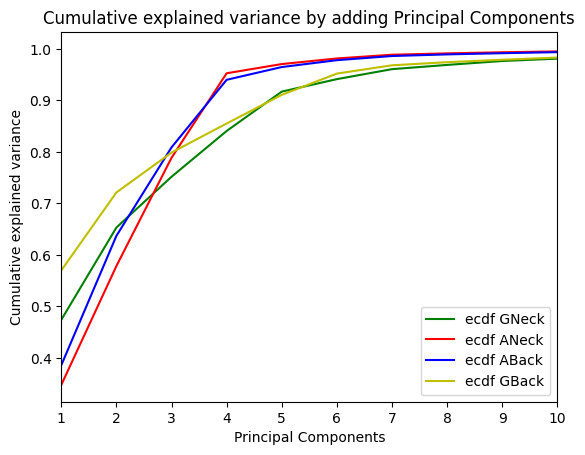

In [ ]:
#PCA plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select features on which PCA should be applied
X_train_cov = pd.DataFrame(X_train, columns=["mean_ANeck_x", "mean_ANeck_y", "mean_ANeck_z", "mean_GNeck_x", "mean_GNeck_y", "mean_GNeck_z", "positional_offset_ANeck", "positional_offset_GNeck", "sum_std_dev_ANeck", "sum_std_dev_GNeck", "total_mean_crossings_ANeck", "total_mean_crossings_GNeck", "ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7", "ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7", "ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7", "ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7", "ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7", "ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7", "mean_ABack_x", "mean_ABack_y", "mean_ABack_z", "mean_GBack_x", "mean_GBack_y", "mean_GBack_z", "positional_offset_ABack", "positional_offset_GBack", "sum_std_dev_ABack", "sum_std_dev_GBack", "total_mean_crossings_ABack", "total_mean_crossings_GBack", "ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7", "ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7", "ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7", "ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7", "ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7", "ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"])
pca_plot_GNeck = X_train_cov[["ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7",
"ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7",
"ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7"]]
pca_plot_ANeck = X_train_cov[["ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7",
"ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7",
"ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7"]]
pca_plot_ABack = X_train_cov[["ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7",
"ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7",
"ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7"]]
pca_plot_GBack = X_train_cov[["ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7",
"ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7",
"ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"]]

# make covariance matrix
cov_matrix_GNeck = np.cov(pca_plot_GNeck.T)
# Create eigenvectoren and eigenwaarden (explained covariance)
eig_values_GNeck, eig_vectors_GNeck = np.linalg.eig(cov_matrix_GNeck)
# Sort on biggest eigenwaarden
sorted_indices_GNeck = np.argsort(eig_values_GNeck)[::-1]
# Calculate the cumulative values of the explained covariance (in % of the total)
cum_cov_GNeck = np.cumsum(eig_values_GNeck[sorted_indices_GNeck]) / np.sum(eig_values_GNeck[sorted_indices_GNeck])

#Repeat for other selected features
cov_matrix_ANeck = np.cov(pca_plot_ANeck.T)
eig_values_ANeck, eig_vectors_ANeck = np.linalg.eig(cov_matrix_ANeck)
sorted_indices_ANeck = np.argsort(eig_values_ANeck)[::-1]
sorted_eig_vectors_ANeck = eig_vectors_ANeck[:, sorted_indices_ANeck]
cum_cov_ANeck = np.cumsum(eig_values_ANeck[sorted_indices_ANeck]) / np.sum(eig_values_ANeck[sorted_indices_ANeck])

cov_matrix_ABack = np.cov(pca_plot_ABack.T)
eig_values_ABack, eig_vectors_ABack = np.linalg.eig(cov_matrix_ABack)
sorted_indices_ABack = np.argsort(eig_values_ABack)[::-1]
sorted_eig_vectors_ABack = eig_vectors_ABack[:, sorted_indices_ABack]
cum_cov_ABack = np.cumsum(eig_values_ABack[sorted_indices_ABack]) / np.sum(eig_values_ABack[sorted_indices_ABack])

cov_matrix_GBack = np.cov(pca_plot_GBack.T)
eig_values_GBack, eig_vectors_GBack = np.linalg.eig(cov_matrix_GBack)
sorted_indices_GBack = np.argsort(eig_values_GBack)[::-1]
sorted_eig_vectors_GBack = eig_vectors_GBack[:, sorted_indices_GBack]
cum_cov_GBack = np.cumsum(eig_values_GBack[sorted_indices_GBack]) / np.sum(eig_values_GBack[sorted_indices_GBack])

# Plot all of the cumulative explained covariance for each subset of features
x_int = range(1, 22)
plt.plot(x_int, cum_cov_GNeck, label="ecdf GNeck", color="g")
plt.plot(x_int, cum_cov_ANeck, label="ecdf ANeck", color="r")
plt.plot(x_int, cum_cov_ABack, label="ecdf ABack", color="b")
plt.plot(x_int, cum_cov_GBack, label="ecdf GBack", color="y")
plt.legend()

plt.title("Cumulative explained variance by adding Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative explained variance")
plt.xticks(x_int)
plt.xlim(1, 10)

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

pca_ecdf_GNeck = ["ecdf_GNeck_x_1", "ecdf_GNeck_x_2", "ecdf_GNeck_x_3", "ecdf_GNeck_x_4", "ecdf_GNeck_x_5", "ecdf_GNeck_x_6", "ecdf_GNeck_x_7",
"ecdf_GNeck_y_1", "ecdf_GNeck_y_2", "ecdf_GNeck_y_3", "ecdf_GNeck_y_4", "ecdf_GNeck_y_5", "ecdf_GNeck_y_6", "ecdf_GNeck_y_7",
"ecdf_GNeck_z_1", "ecdf_GNeck_z_2", "ecdf_GNeck_z_3", "ecdf_GNeck_z_4", "ecdf_GNeck_z_5", "ecdf_GNeck_z_6", "ecdf_GNeck_z_7"]
pca_ecdf_ANeck = ["ecdf_ANeck_x_1", "ecdf_ANeck_x_2", "ecdf_ANeck_x_3", "ecdf_ANeck_x_4", "ecdf_ANeck_x_5", "ecdf_ANeck_x_6", "ecdf_ANeck_x_7",
"ecdf_ANeck_y_1", "ecdf_ANeck_y_2", "ecdf_ANeck_y_3", "ecdf_ANeck_y_4", "ecdf_ANeck_y_5", "ecdf_ANeck_y_6", "ecdf_ANeck_y_7",
"ecdf_ANeck_z_1", "ecdf_ANeck_z_2", "ecdf_ANeck_z_3", "ecdf_ANeck_z_4", "ecdf_ANeck_z_5", "ecdf_ANeck_z_6", "ecdf_ANeck_z_7"]
pca_ecdf_ABack = ["ecdf_ABack_x_1", "ecdf_ABack_x_2", "ecdf_ABack_x_3", "ecdf_ABack_x_4", "ecdf_ABack_x_5", "ecdf_ABack_x_6", "ecdf_ABack_x_7",
"ecdf_ABack_y_1", "ecdf_ABack_y_2", "ecdf_ABack_y_3", "ecdf_ABack_y_4", "ecdf_ABack_y_5", "ecdf_ABack_y_6", "ecdf_ABack_y_7",
"ecdf_ABack_z_1", "ecdf_ABack_z_2", "ecdf_ABack_z_3", "ecdf_ABack_z_4", "ecdf_ABack_z_5", "ecdf_ABack_z_6", "ecdf_ABack_z_7"]
pca_ecdf_GBack = ["ecdf_GBack_x_1", "ecdf_GBack_x_2", "ecdf_GBack_x_3", "ecdf_GBack_x_4", "ecdf_GBack_x_5", "ecdf_GBack_x_6", "ecdf_GBack_x_7",
"ecdf_GBack_y_1", "ecdf_GBack_y_2", "ecdf_GBack_y_3", "ecdf_GBack_y_4", "ecdf_GBack_y_5", "ecdf_GBack_y_6", "ecdf_GBack_y_7",
"ecdf_GBack_z_1", "ecdf_GBack_z_2", "ecdf_GBack_z_3", "ecdf_GBack_z_4", "ecdf_GBack_z_5", "ecdf_GBack_z_6", "ecdf_GBack_z_7"]

# ColumnTransformer with PCA transformation
column_transformer = ColumnTransformer(
    transformers=[("PCA_GNeck", PCA(n_components=5), pca_ecdf_GNeck), ("PCA_ANeck", PCA(n_components=5), pca_ecdf_ANeck), ("PCA_ABack", PCA(n_components=5), pca_ecdf_ABack), ("PCA_GBack", PCA(n_components=5), pca_ecdf_GBack)],
    remainder='passthrough'
)


In [ ]:
# Apply the PCA column_transformer on X-train, X-test and X-Val
X_train_pca = column_transformer.fit_transform(X_train)
X_test_pca = column_transformer.transform(X_test)
X_val_pca = column_transformer.transform(X_val)

feature_names_pca = column_transformer.get_feature_names_out()

# Convert X_train_pca and X_test_pca to DataFrames with new feature names
X_train_pca = pd.DataFrame(X_train_pca, columns=feature_names_pca)
X_test_pca = pd.DataFrame(X_test_pca, columns=feature_names_pca)
X_val_pca = pd.DataFrame(X_val_pca, columns=feature_names_pca)

print(X_train_pca.shape)
print("Kolomnamen in de DataFrame:")
for column in X_train_pca.columns:
    print(column)

(44813, 44)
Kolomnamen in de DataFrame:
PCA_GNeck__pca0
PCA_GNeck__pca1
PCA_GNeck__pca2
PCA_GNeck__pca3
PCA_GNeck__pca4
PCA_ANeck__pca0
PCA_ANeck__pca1
PCA_ANeck__pca2
PCA_ANeck__pca3
PCA_ANeck__pca4
PCA_ABack__pca0
PCA_ABack__pca1
PCA_ABack__pca2
PCA_ABack__pca3
PCA_ABack__pca4
PCA_GBack__pca0
PCA_GBack__pca1
PCA_GBack__pca2
PCA_GBack__pca3
PCA_GBack__pca4
remainder__mean_ANeck_x
remainder__mean_ANeck_y
remainder__mean_ANeck_z
remainder__mean_GNeck_x
remainder__mean_GNeck_y
remainder__mean_GNeck_z
remainder__positional_offset_ANeck
remainder__positional_offset_GNeck
remainder__sum_std_dev_ANeck
remainder__sum_std_dev_GNeck
remainder__total_mean_crossings_ANeck
remainder__total_mean_crossings_GNeck
remainder__mean_ABack_x
remainder__mean_ABack_y
remainder__mean_ABack_z
remainder__mean_GBack_x
remainder__mean_GBack_y
remainder__mean_GBack_z
remainder__positional_offset_ABack
remainder__positional_offset_GBack
remainder__sum_std_dev_ABack
remainder__sum_std_dev_GBack
remainder__total_mea

In [ ]:
# #Clean up the column names by removing "remainder__"
X_train_pca.columns = [column.split("r__")[-1] for column in X_train_pca.columns]
X_test_pca.columns = [column.split("r__")[-1] for column in X_test_pca.columns]
X_val_pca.columns = [column.split("r__")[-1] for column in X_val_pca.columns]
# Update X_train and X_test
X_train = X_train_pca
X_test = X_test_pca
X_val = X_val_pca

Random resampling (Using multiple thresholds)

In [ ]:
from sklearn.utils import resample
import numpy as np

undersample_threshold = 7000

# Create empty set
new_indices = set()

# Collect the indices for each label and resample them (if amount is below threshold)
for label in y_train.columns:
    label_indices = y_train[y_train[label] == 1].index
    if len(label_indices) > undersample_threshold:
        label_indices = resample(label_indices, n_samples=undersample_threshold, random_state=2)
    new_indices.update(label_indices)

# Sort indices and create new X_train
undersampled_indices = sorted(new_indices)
X_undersample_7000 = X_train.loc[undersampled_indices]
y_undersample_7000 = y_train.loc[undersampled_indices]

print("New counts for each label:")
print(y_undersample_7000.sum(axis=0))

New counts for each label:
Shaking              267
Trotting            5010
Walking             5134
Sitting             5408
Eating              2038
Standing            6617
Galloping           1114
Carrying object      923
Tugging             1960
Sniffing            6589
Playing             6030
Lying chest         5359
Jumping              166
Panting            10059
Pacing               517
Drinking             496
dtype: int64


In [ ]:
undersample_threshold = 5000

# Create empty set
new_indices = set()

# Collect the indices for each label and resample them (if amount is below threshold)
for label in y_train.columns:
    label_indices = y_train[y_train[label] == 1].index
    if len(label_indices) > undersample_threshold:
        label_indices = resample(label_indices, n_samples=undersample_threshold, random_state=2)
    new_indices.update(label_indices)

# Sort indices and create new X_train
undersampled_indices = sorted(new_indices)
X_undersample_5000 = X_train.loc[undersampled_indices]
y_undersample_5000 = y_train.loc[undersampled_indices]

print("New counts for each label:")
print(y_undersample_5000.sum(axis=0))

New counts for each label:
Shaking             267
Trotting           3289
Walking            3276
Sitting            4632
Eating             2038
Standing           4516
Galloping          1114
Carrying object     923
Tugging            1960
Sniffing           3521
Playing            4933
Lying chest        4581
Jumping             166
Panting            8049
Pacing              517
Drinking            496
dtype: int64


In [ ]:
undersample_threshold = 3000

# Create empty set
new_indices = set()

# Collect the indices for each label and resample them (if amount is below threshold)
for label in y_train.columns:
    label_indices = y_train[y_train[label] == 1].index
    if len(label_indices) > undersample_threshold:
        label_indices = resample(label_indices, n_samples=undersample_threshold, random_state=2)
    new_indices.update(label_indices)

# Sort indices and create new X_train
undersampled_indices = sorted(new_indices)
X_undersample_3000 = X_train.loc[undersampled_indices]
y_undersample_3000 = y_train.loc[undersampled_indices]

print("New counts for each label:")
print(y_undersample_3000.sum(axis=0))

New counts for each label:
Shaking             267
Trotting           2438
Walking            2382
Sitting            3440
Eating             2038
Standing           3455
Galloping          1114
Carrying object     923
Tugging            1960
Sniffing           2416
Playing            4488
Lying chest        3400
Jumping             166
Panting            5812
Pacing              517
Drinking            496
dtype: int64


In [ ]:
undersample_threshold = 1000

# Create empty set
new_indices = set()

# Collect the indices for each label and resample them (if amount is below threshold)
for label in y_train.columns:
    label_indices = y_train[y_train[label] == 1].index
    if len(label_indices) > undersample_threshold:
        label_indices = resample(label_indices, n_samples=undersample_threshold, random_state=2)
    new_indices.update(label_indices)

# Sort indices and create new X_train
undersampled_indices = sorted(new_indices)
X_undersample_1000 = X_train.loc[undersampled_indices]
y_undersample_1000 = y_train.loc[undersampled_indices]

print("New counts for each label:")
print(y_undersample_1000.sum(axis=0))

New counts for each label:
Shaking             267
Trotting           1149
Walking             999
Sitting            1431
Eating              973
Standing           1465
Galloping           947
Carrying object     923
Tugging            1040
Sniffing            935
Playing            2745
Lying chest        1396
Jumping             166
Panting            2401
Pacing              517
Drinking            496
dtype: int64


# **Baseline Model: ClassifierChain in combination with a DecisionTreeClassifier**

In [ ]:
#Without Undersampling

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [10, 15, 20],
    "base_estimator__min_samples_split": [2, 5, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4],
    "base_estimator__max_features": ["sqrt", "log2"],
    "base_estimator__class_weight": [None, "balanced"]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model (using all posible configurations)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_train, y_train)
                    y_pred = chain_model_DT.predict(X_val)
                    # Calculate F1 on validation data
                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    # Select configuration with highest macro F1
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT = chain_model_DT

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for comparison between models on different training sets (using different undersampling thresholds)
y_pred = best_chain_model_DT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6492352085494766
Optimal configuration: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 4, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.91      0.86      0.88        84
       Trotting       0.88      0.88      0.88      1565
        Walking       0.88      0.87      0.88      1604
        Sitting       0.95      0.95      0.95      2250
         Eating       0.35      0.24      0.28       637
       Standing       0.78      0.79      0.78      2068
      Galloping       0.55      0.45      0.49       345
Carrying object       0.36      0.24      0.29       283
        Tugging       0.47      0.34      0.40       560
       Sniffing       0.94      0.93      0.93      2059
        Playing       0.85      0.80      0.82      1884
    Lying chest       0.81      0.78      0.79      2264
        Ju

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Undersampling = 7000

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [10, 15, 20],
    "base_estimator__min_samples_split": [2, 5, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4],
    "base_estimator__max_features": ["sqrt", "log2"],
    "base_estimator__class_weight": [None, "balanced"]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model (using all posible configurations)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_undersample_7000, y_undersample_7000)
                    y_pred = chain_model_DT.predict(X_val)
                    # Calculate F1 on validation data
                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    # Select configuration with highest macro F1
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT_7000 = chain_model_DT

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for comparison between models on different training sets (using different undersampling thresholds)
y_pred = best_chain_model_DT_7000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6448375873905795
Optimal configuration: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 4, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.91      0.88      0.90        84
       Trotting       0.87      0.87      0.87      1565
        Walking       0.90      0.87      0.88      1604
        Sitting       0.97      0.94      0.96      2250
         Eating       0.34      0.25      0.29       637
       Standing       0.75      0.80      0.78      2068
      Galloping       0.47      0.40      0.43       345
Carrying object       0.30      0.17      0.21       283
        Tugging       0.45      0.36      0.40       560
       Sniffing       0.93      0.93      0.93      2059
        Playing       0.83      0.80      0.81      1884
    Lying chest       0.80      0.75      0.77      2264
        J

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Undersampling = 5000

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [10, 15, 20],
    "base_estimator__min_samples_split": [2, 5, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4],
    "base_estimator__max_features": ["sqrt", "log2"],
    "base_estimator__class_weight": [None, "balanced"]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model (using all posible configurations)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_undersample_5000, y_undersample_5000)
                    y_pred = chain_model_DT.predict(X_val)
                    # Calculate F1 on validation data
                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    # Select configuration with highest macro F1
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT_5000 = chain_model_DT

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for comparison between models on different training sets (using different undersampling thresholds)
y_pred = best_chain_model_DT_5000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6408523488843741
Optimal configuration: {'base_estimator__max_depth': 15, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.90      0.89      0.90        84
       Trotting       0.87      0.87      0.87      1565
        Walking       0.87      0.86      0.86      1604
        Sitting       0.93      0.94      0.94      2250
         Eating       0.35      0.30      0.32       637
       Standing       0.75      0.76      0.75      2068
      Galloping       0.51      0.53      0.52       345
Carrying object       0.32      0.26      0.29       283
        Tugging       0.42      0.46      0.44       560
       Sniffing       0.94      0.92      0.93      2059
        Playing       0.80      0.82      0.81      1884
    Lying chest       0.77      0.72      0.74      2264
        J

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Undersampling = 3000

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [10, 15, 20],
    "base_estimator__min_samples_split": [2, 5, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4],
    "base_estimator__max_features": ["sqrt", "log2"],
    "base_estimator__class_weight": [None, "balanced"]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model (using all posible configurations)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_undersample_3000, y_undersample_3000)
                    y_pred = chain_model_DT.predict(X_val)
                    # Calculate F1 on validation data
                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    # Select configuration with highest macro F1
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT_3000 = chain_model_DT

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for comparison between models on different training sets (using different undersampling thresholds)
y_pred = best_chain_model_DT_3000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6308123742842364
Optimal configuration: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.80      0.87      0.83        84
       Trotting       0.86      0.91      0.88      1565
        Walking       0.87      0.91      0.89      1604
        Sitting       0.94      0.94      0.94      2250
         Eating       0.23      0.54      0.32       637
       Standing       0.69      0.79      0.74      2068
      Galloping       0.44      0.76      0.56       345
Carrying object       0.26      0.57      0.36       283
        Tugging       0.34      0.59      0.43       560
       Sniffing       0.94      0.89      0.91      2059
        Playing       0.77      0.84      0.80      1884
    Lying chest       0.78      0.66      0.71      2264
    

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Undersampling = 1000

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [10, 15, 20],
    "base_estimator__min_samples_split": [2, 5, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4],
    "base_estimator__max_features": ["sqrt", "log2"],
    "base_estimator__class_weight": [None, "balanced"]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model (using all posible configurations)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_undersample_1000, y_undersample_1000)
                    y_pred = chain_model_DT.predict(X_val)
                    # Calculate F1 on validation data
                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    # Select configuration with highest macro F1
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT_1000 = chain_model_DT

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for comparison between models on different training sets (using different undersampling thresholds)
y_pred = best_chain_model_DT_1000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6022743064723415
Optimal configuration: {'base_estimator__max_depth': 15, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.87      0.93      0.90        84
       Trotting       0.90      0.76      0.83      1565
        Walking       0.87      0.80      0.84      1604
        Sitting       0.94      0.90      0.92      2250
         Eating       0.23      0.39      0.29       637
       Standing       0.68      0.70      0.69      2068
      Galloping       0.45      0.63      0.52       345
Carrying object       0.24      0.42      0.30       283
        Tugging       0.39      0.43      0.41       560
       Sniffing       0.93      0.83      0.88      2059
        Playing       0.81      0.78      0.80      1884
    Lying chest       0.73      0.67      0.70      2264
        Ju

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#BEST MODEL
#No Undersampling
#Optimal configuration: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 4, 'base_estimator__max_features': 'sqrt', 'base_estimator__class_weight': None}

from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "base_estimator__max_depth": [20],
    "base_estimator__min_samples_split": [2],
    "base_estimator__min_samples_leaf": [4],
    "base_estimator__max_features": ["sqrt"],
    "base_estimator__class_weight": [None]}

for max_depth in param_grid["base_estimator__max_depth"]:
    for min_samples_split in param_grid["base_estimator__min_samples_split"]:
        for min_samples_leaf in param_grid["base_estimator__min_samples_leaf"]:
            for max_features in param_grid["base_estimator__max_features"]:
                for class_weight in param_grid["base_estimator__class_weight"]:
                    # Initialize model with best parameters (gridsearch is not used)
                    chain_model_DT = ClassifierChain(DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight))
                    # Fit model on X-train
                    chain_model_DT.fit(X_train, y_train)
                    y_pred = chain_model_DT.predict(X_val)

                    macro_f1 = f1_score(y_val, y_pred, average = "macro")
                    if macro_f1 > best_macro_f1:
                        best_macro_f1 = macro_f1
                        best_params = {
                          "base_estimator__max_depth": max_depth,
                          "base_estimator__min_samples_split": min_samples_split,
                          "base_estimator__min_samples_leaf": min_samples_leaf,
                          "base_estimator__max_features": max_features,
                          "base_estimator__class_weight": class_weight}
                        best_chain_model_DT = chain_model_DT

# Test performance on test data
y_pred = best_chain_model_DT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

                 precision    recall  f1-score   support

        Shaking       0.91      0.86      0.88        84
       Trotting       0.88      0.88      0.88      1565
        Walking       0.88      0.87      0.88      1604
        Sitting       0.95      0.95      0.95      2250
         Eating       0.35      0.24      0.28       637
       Standing       0.78      0.79      0.78      2068
      Galloping       0.55      0.45      0.49       345
Carrying object       0.36      0.24      0.29       283
        Tugging       0.47      0.34      0.40       560
       Sniffing       0.94      0.93      0.93      2059
        Playing       0.85      0.80      0.82      1884
    Lying chest       0.81      0.78      0.79      2264
        Jumping       0.12      0.08      0.10        49
        Panting       0.78      0.78      0.78      3595
         Pacing       0.26      0.30      0.27       162
       Drinking       0.51      0.51      0.51        53

      micro avg       0.81   

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


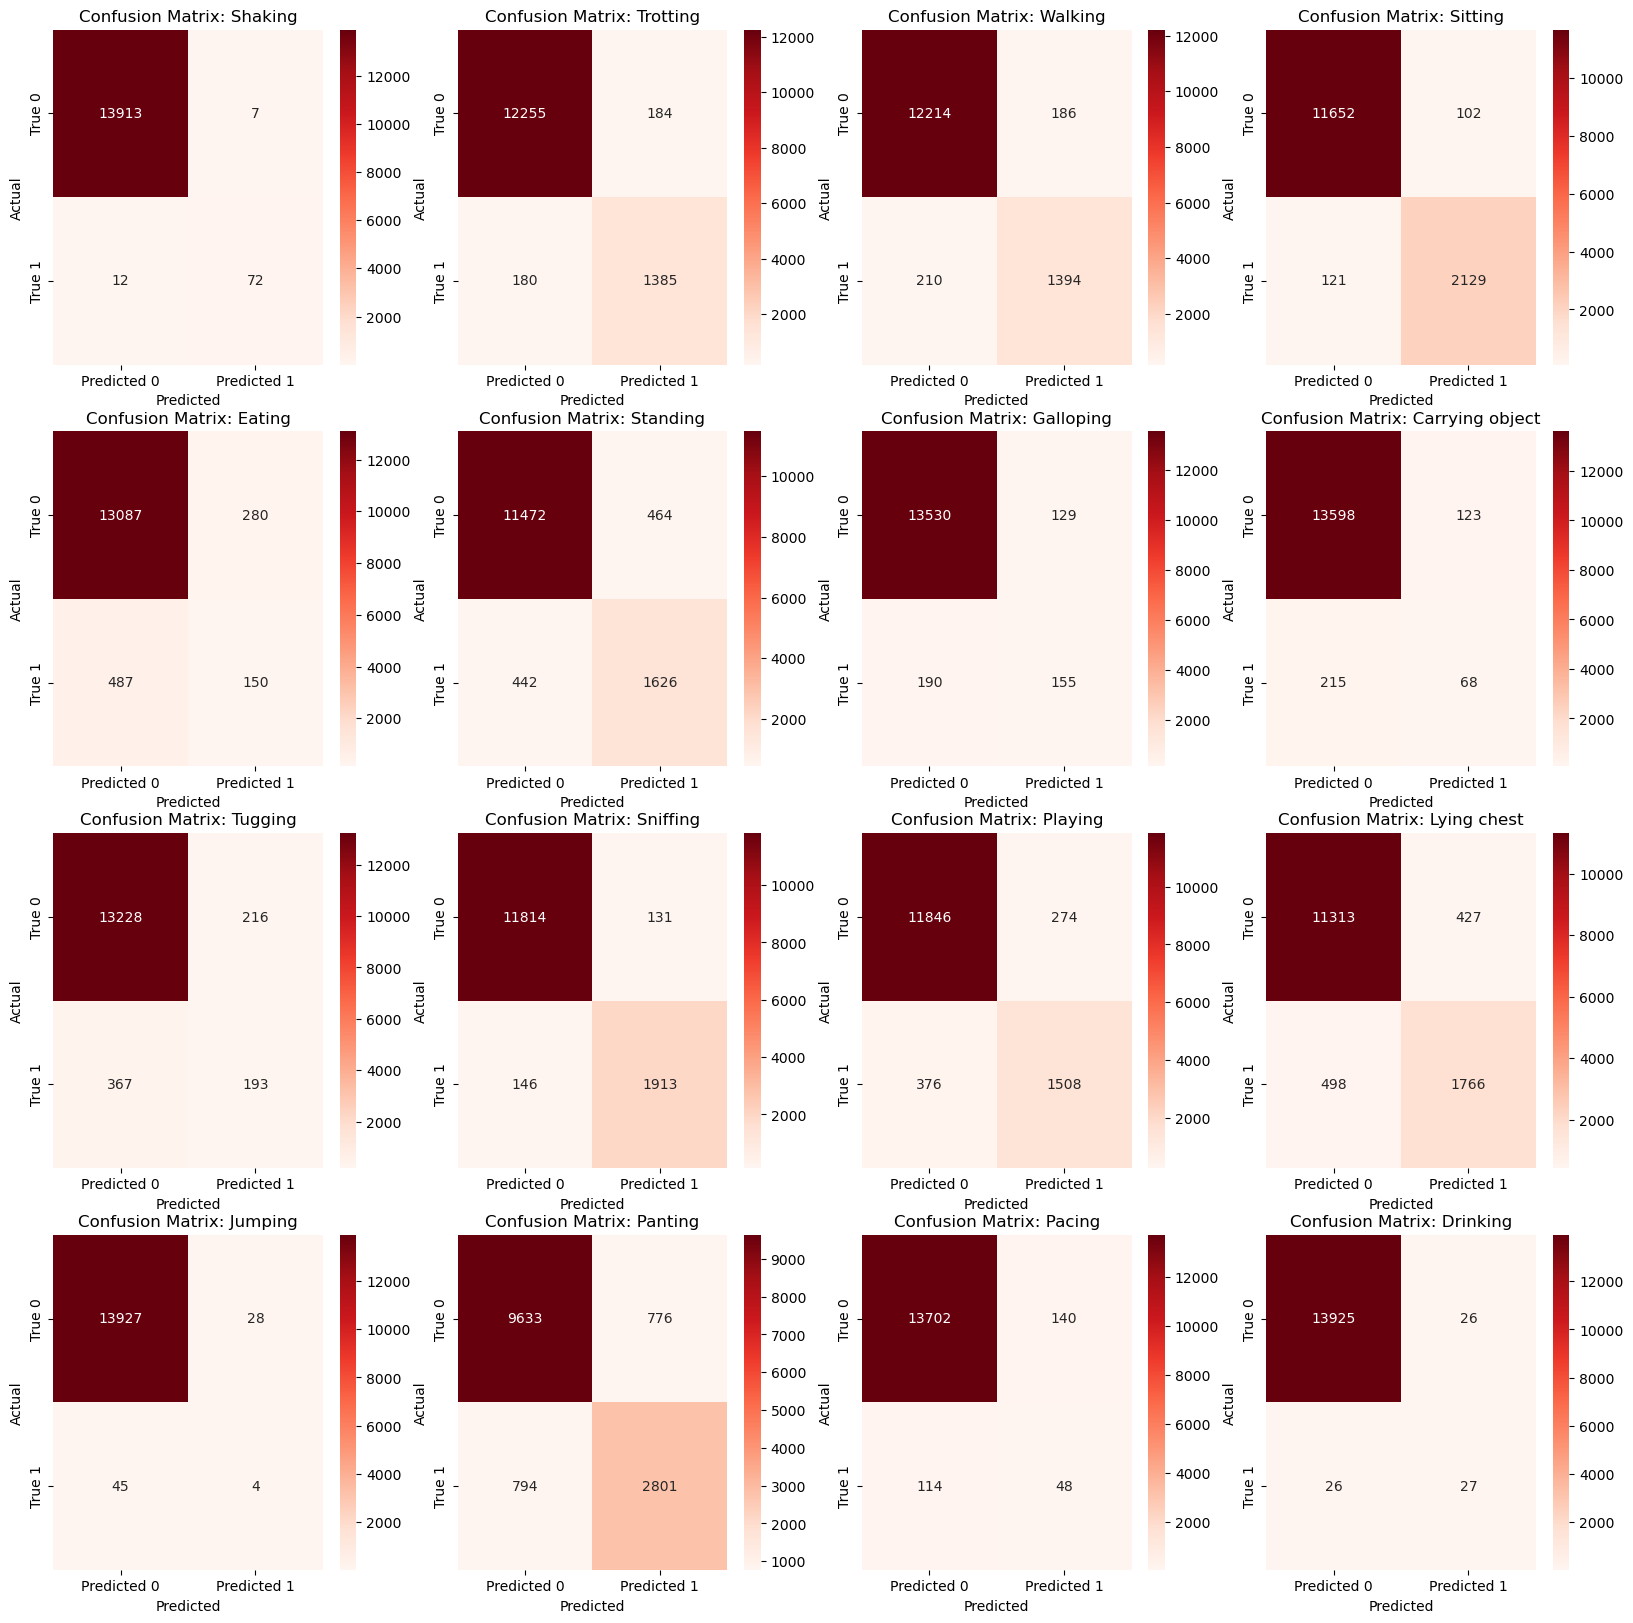

In [ ]:
# multilabel confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Create multilabel confusion matrix (array)
cm =multilabel_confusion_matrix(y_test, y_pred)
labels = ["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]

total_labels = len(labels)
# Create 16 subplots (for each label)
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
# flatten to create one dimensional array
ax = ax.flatten()

# Plot the heatmap/confusion matrix for each label
for label in range(total_labels):
    title = labels[label]
    sns.heatmap(cm[label], annot=True, cmap= "Reds", ax=ax[label], xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
    ax[label].set_title(f"Confusion Matrix: {title}")
    ax[label].set_ylabel("Actual")
    ax[label].set_xlabel("Predicted")

plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Use permutation importance function
permutation_imp = permutation_importance(best_chain_model_DT, X_train, y_train, n_repeats = 5, n_jobs=-1)
# Create Dataframe
permutation_imp = pd.DataFrame({"feature" : X_train.columns,
                                "importance": permutation_imp.importances_mean})
# Sort Dataframe
permutation_imp = permutation_imp.sort_values(by= "importance", ascending=False)

print(permutation_imp)

                       feature  importance
15             PCA_GBack__pca0    0.453270
41           sum_std_dev_GBack    0.338210
10             PCA_ABack__pca0    0.281387
33                mean_ABack_y    0.258309
11             PCA_ABack__pca1    0.251690
40           sum_std_dev_ABack    0.248763
34                mean_ABack_z    0.217138
38     positional_offset_ABack    0.216602
13             PCA_ABack__pca3    0.209662
39     positional_offset_GBack    0.138192
18             PCA_GBack__pca3    0.123995
42  total_mean_crossings_ABack    0.099078
35                mean_GBack_x    0.098396
14             PCA_ABack__pca4    0.089889
43  total_mean_crossings_GBack    0.065182
12             PCA_ABack__pca2    0.063874
36                mean_GBack_y    0.061768
21                mean_ANeck_y    0.054002
29           sum_std_dev_GNeck    0.045264
37                mean_GBack_z    0.044813
0              PCA_GNeck__pca0    0.041028
16             PCA_GBack__pca1    0.040926
32         

In [ ]:
# Multilabel prediction count
# Sum binary values of label prediction for each row
label_counts = np.sum(y_pred, axis=1)
# Create DataFrame
count_label_predictions = pd.DataFrame(label_counts, columns=['predicted_label_count'])
# Count how many times multiple prediction occur
summary_label_pred = count_label_predictions['predicted_label_count'].value_counts().sort_index()

print(summary_label_pred)

predicted_label_count
0.0     535
1.0    8636
2.0    4421
3.0     394
4.0      18
Name: count, dtype: int64


# **RAkELo**(DT)

In [ ]:
# The RAkELo-algorithm originates from the study of Tsoumakas, Katakis, and Vlahavas (2011)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "max_depth": [10, 15, 20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"],
    "model_count": [15, 20, 25],
    "labelset_size": [5, 7, 9],
    "class_weight": [None, "balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # initialize RAkELo and DecisionTree with each configuration
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_train, y_train)
                  y_pred = rakelo_model.predict(X_val)
                  # Calculate macro F1 using y_val
                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      # Select model with best macro F1 performance
                      best_rakelo = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparison on different X_trains (using differen undersampling thresholds)
y_pred = best_rakelo.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7332102633414248
Optimal configuration: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 20, 'labelset_size': 7, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.95      0.93      0.94        84
       Trotting       0.89      0.96      0.92      1565
        Walking       0.88      0.96      0.91      1604
        Sitting       0.98      0.97      0.97      2250
         Eating       0.36      0.57      0.44       637
       Standing       0.77      0.90      0.83      2068
      Galloping       0.57      0.74      0.64       345
Carrying object       0.39      0.44      0.41       283
        Tugging       0.47      0.59      0.52       560
       Sniffing       0.97      0.97      0.97      2059
        Playing       0.87      0.88      0.88      1884
    Lying chest       0.93      0.76      0.83      2264
        Jumping       0.58      0.39      0.4

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#undersampling = 7000
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "max_depth": [10, 15, 20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"],
    "model_count": [15, 20, 25],
    "labelset_size": [5, 7, 9],
    "class_weight": [None, "balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # initialize RAkELo and DecisionTree with each configuration
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_undersample_7000, y_undersample_7000)
                  y_pred = rakelo_model.predict(X_val)
                  # Calculate macro F1 using y_val
                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      # Select model with best macro F1 performance
                      best_rakelo_7000 = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparison on different X_trains (using differen undersampling thresholds)
y_pred = best_rakelo_7000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7333527012060366
Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 25, 'labelset_size': 5, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.94      0.93      0.93        84
       Trotting       0.91      0.96      0.93      1565
        Walking       0.91      0.94      0.93      1604
        Sitting       0.99      0.94      0.97      2250
         Eating       0.40      0.41      0.41       637
       Standing       0.80      0.90      0.84      2068
      Galloping       0.56      0.71      0.62       345
Carrying object       0.56      0.38      0.45       283
        Tugging       0.55      0.39      0.45       560
       Sniffing       0.97      0.95      0.96      2059
        Playing       0.92      0.87      0.90      1884
    Lying chest       0.96      0.77      0.85      2264
        Jumping       0.43      0.27      0.3

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#undersampling = 5000
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "max_depth": [10, 15, 20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"],
    "model_count": [15, 20, 25],
    "labelset_size": [5, 7, 9],
    "class_weight": [None, "balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # initialize RAkELo and DecisionTree with each configuration
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_undersample_5000, y_undersample_5000)
                  y_pred = rakelo_model.predict(X_val)
                  # Calculate macro F1 using y_val
                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      # Select model with best macro F1 performance
                      best_rakelo_5000 = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparison on different X_trains (using differen undersampling thresholds)
y_pred = best_rakelo_5000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7352213887802107
Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 20, 'labelset_size': 5, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.94      0.88      0.91        84
       Trotting       0.94      0.90      0.92      1565
        Walking       0.93      0.92      0.92      1604
        Sitting       0.98      0.96      0.97      2250
         Eating       0.46      0.45      0.45       637
       Standing       0.84      0.81      0.83      2068
      Galloping       0.53      0.73      0.61       345
Carrying object       0.44      0.43      0.43       283
        Tugging       0.58      0.37      0.45       560
       Sniffing       0.97      0.94      0.96      2059
        Playing       0.89      0.87      0.88      1884
    Lying chest       0.92      0.80      0.85      2264
        Jumping       0.55      0.37      0.4

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#undersampling = 3000
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "max_depth": [10, 15, 20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"],
    "model_count": [15, 20, 25],
    "labelset_size": [5, 7, 9],
    "class_weight": [None, "balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # initialize RAkELo and DecisionTree with each configuration
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_undersample_3000, y_undersample_3000)
                  y_pred = rakelo_model.predict(X_val)
                  # Calculate macro F1 using y_val
                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      # Select model with best macro F1 performance
                      best_rakelo_3000 = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparison on different X_trains (using differen undersampling thresholds)
y_pred = best_rakelo_3000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7279273255439469
Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 20, 'labelset_size': 7, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.94      0.92      0.93        84
       Trotting       0.92      0.93      0.93      1565
        Walking       0.94      0.89      0.92      1604
        Sitting       0.97      0.96      0.96      2250
         Eating       0.51      0.38      0.43       637
       Standing       0.84      0.83      0.84      2068
      Galloping       0.57      0.70      0.63       345
Carrying object       0.46      0.38      0.42       283
        Tugging       0.54      0.47      0.50       560
       Sniffing       0.97      0.95      0.96      2059
        Playing       0.88      0.88      0.88      1884
    Lying chest       0.93      0.74      0.83      2264
        Jumping       0.67      0.08      0.1

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#undersampling = 1000
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Apply gridsearch
param_grid = {
    "max_depth": [10, 15, 20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"],
    "model_count": [15, 20, 25],
    "labelset_size": [5, 7, 9],
    "class_weight": [None, "balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # initialize RAkELo and DecisionTree with each configuration
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_undersample_1000, y_undersample_1000)
                  y_pred = rakelo_model.predict(X_val)
                  # Calculate macro F1 using y_val
                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      # Select model with best macro F1 performance
                      best_rakelo_1000 = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparison on different X_trains (using differen undersampling thresholds)
y_pred = best_rakelo_1000.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7147573921758588
Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 25, 'labelset_size': 9, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.91      0.94      0.92        84
       Trotting       0.94      0.88      0.91      1565
        Walking       0.94      0.87      0.90      1604
        Sitting       0.97      0.95      0.96      2250
         Eating       0.46      0.39      0.42       637
       Standing       0.78      0.84      0.81      2068
      Galloping       0.52      0.77      0.62       345
Carrying object       0.48      0.45      0.46       283
        Tugging       0.59      0.36      0.44       560
       Sniffing       0.98      0.92      0.94      2059
        Playing       0.90      0.86      0.88      1884
    Lying chest       0.91      0.70      0.79      2264
        Jumping       0.75      0.06      0.1

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Best model
# undersampling threshold = 5000
#Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 20, 'labelset_size': 5, 'class_weight': 'balanced'}

from sklearn.tree import DecisionTreeClassifier
from skmultilearn.ensemble import RakelO
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

best_macro_f1 = 0

# Gridsearch is not applied, only best configuration parameters are used
param_grid = {
    "max_depth": [20],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"],
    "model_count": [20],
    "labelset_size": [5],
    "class_weight": ["balanced"]
    }

for max_depth in param_grid["max_depth"]:
    for min_samples_split in param_grid["min_samples_split"]:
      for min_samples_leaf in param_grid["min_samples_leaf"]:
        for max_features in param_grid["max_features"]:
          for model_count in param_grid["model_count"]:
            for labelset_size in param_grid["labelset_size"]:
                for class_weight in param_grid["class_weight"]:
                  # Initialize model with optimal parameters
                  base_estimator = DecisionTreeClassifier(random_state = 5, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, class_weight=class_weight)
                  rakelo_model = RakelO(base_classifier=base_estimator, model_count=model_count, labelset_size=labelset_size)
                  # Fit the model
                  rakelo_model.fit(X_undersample_5000, y_undersample_5000)
                  y_pred = rakelo_model.predict(X_val)

                  macro_f1 = f1_score(y_val, y_pred, average= "macro")
                  if macro_f1 > best_macro_f1:
                      best_macro_f1 = macro_f1
                      best_params = {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "model_count": model_count,
                        "labelset_size": labelset_size,
                        "class_weight": class_weight}
                      best_rakelo = rakelo_model

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# evaluate performance on test data
y_pred = best_rakelo.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7170515163863369
Optimal configuration: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'model_count': 20, 'labelset_size': 5, 'class_weight': 'balanced'}
                 precision    recall  f1-score   support

        Shaking       0.94      0.88      0.91        84
       Trotting       0.94      0.90      0.92      1565
        Walking       0.94      0.90      0.92      1604
        Sitting       0.98      0.98      0.98      2250
         Eating       0.32      0.49      0.39       637
       Standing       0.78      0.88      0.83      2068
      Galloping       0.52      0.70      0.60       345
Carrying object       0.55      0.31      0.40       283
        Tugging       0.54      0.48      0.51       560
       Sniffing       0.97      0.94      0.95      2059
        Playing       0.92      0.82      0.87      1884
    Lying chest       0.90      0.82      0.86      2264
        Jumping       0.71      0.10      0.1

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


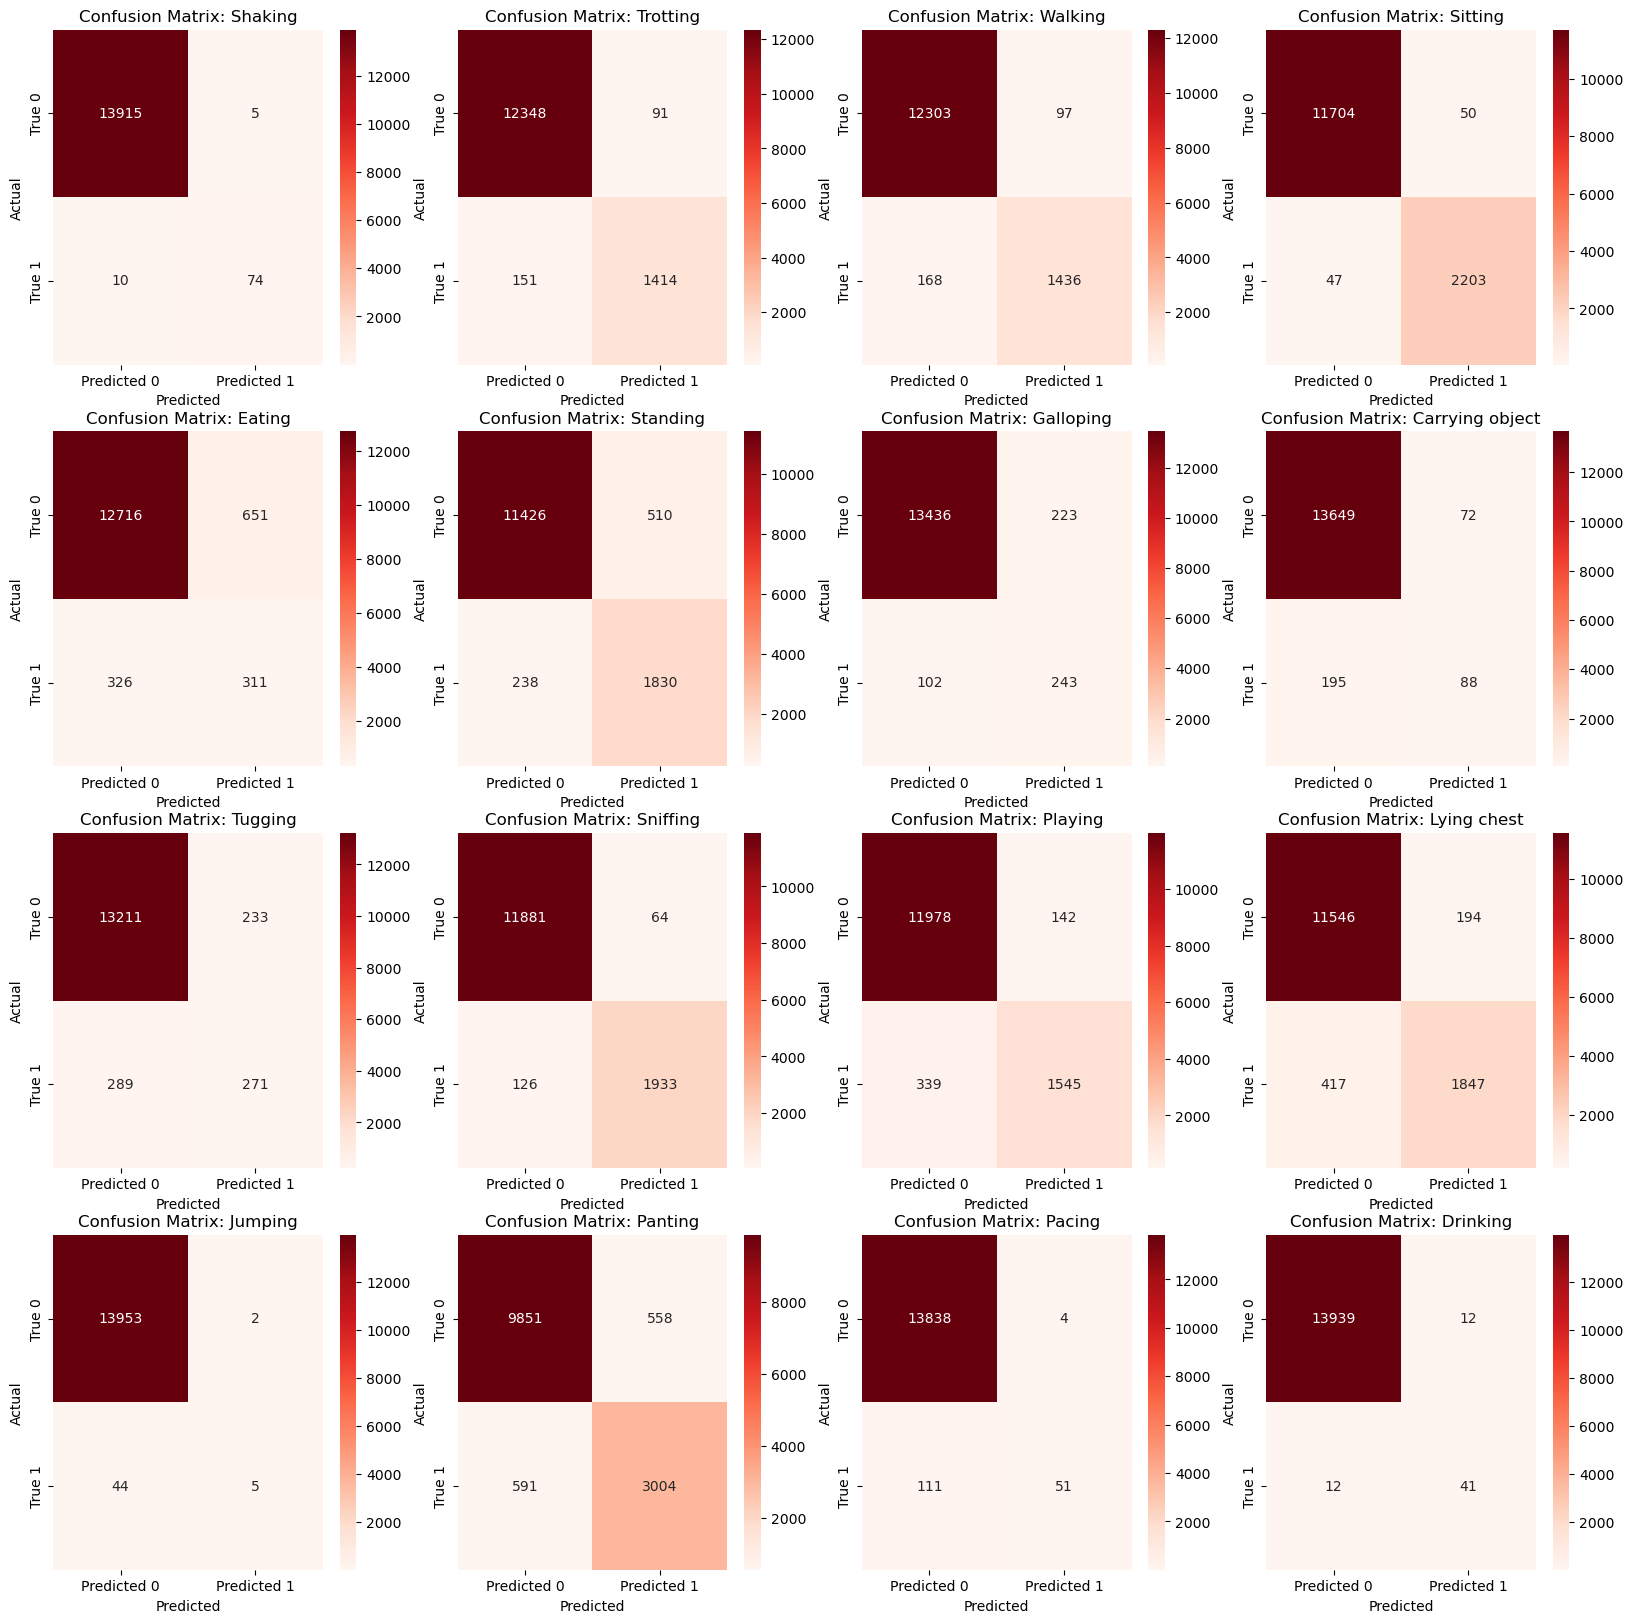

In [ ]:
# multilabel confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Create multilabel confusion matrix (array)
cm =multilabel_confusion_matrix(y_test, y_pred)
labels = ["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]

total_labels = len(labels)

# Plot subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

# Plot confusion matrix in each subplot
for label in range(total_labels):
    title = labels[label]
    sns.heatmap(cm[label], annot=True, cmap= "Reds", ax=ax[label], xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
    ax[label].set_title(f"Confusion Matrix: {title}")
    ax[label].set_ylabel("Actual")
    ax[label].set_xlabel("Predicted")

plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Use permutation imporatance
permutation_imp = permutation_importance(best_rakelo, X_undersample_5000, y_undersample_5000, n_repeats = 5, n_jobs=-1)
# Create DataFrame
permutation_imp = pd.DataFrame({"feature" : X_undersample_5000.columns,
                                "importance": permutation_imp.importances_mean})
# Sort DataFrame
permutation_imp = permutation_imp.sort_values(by= "importance", ascending=False)

print(permutation_imp)

                       feature  importance
41           sum_std_dev_GBack    0.444342
34                mean_ABack_z    0.221630
11             PCA_ABack__pca1    0.207188
33                mean_ABack_y    0.192308
13             PCA_ABack__pca3    0.150723
15             PCA_GBack__pca0    0.145203
40           sum_std_dev_ABack    0.136704
10             PCA_ABack__pca0    0.099207
14             PCA_ABack__pca4    0.052511
39     positional_offset_GBack    0.046272
38     positional_offset_ABack    0.044530
18             PCA_GBack__pca3    0.040893
43  total_mean_crossings_GBack    0.032327
35                mean_GBack_x    0.029463
42  total_mean_crossings_ABack    0.025577
12             PCA_ABack__pca2    0.020090
17             PCA_GBack__pca2    0.018382
21                mean_ANeck_y    0.018140
16             PCA_GBack__pca1    0.016627
0              PCA_GNeck__pca0    0.011309
37                mean_GBack_z    0.011296
28           sum_std_dev_ANeck    0.010845
36         

In [ ]:
# Multilabel prediction count
# Sum binary values of label predictions for each row
label_counts = np.sum(y_pred, axis=1)
# Create DataFrame
count_label_predictions = pd.DataFrame(label_counts, columns=['predicted_label_count'])
# Count how many times multiple prediction occur
summary_label_pred = count_label_predictions['predicted_label_count'].value_counts().sort_index()

print(summary_label_pred)

predicted_label_count
0     740
1    7984
2    4653
3     594
4      33
Name: count, dtype: int64


# **IBLR-ML+**

In [ ]:
#without undersampling
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

for knn in [5, 7, 9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_train)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_train, return_distance=False)

  # Create empty features
  labels_train = np.zeros((X_train.shape[0], y_train.shape[1]))
  # Loop over every instance with corresponding neigbors indices
  for i, neighbors in enumerate(indices_neighbors_train):
      # Update empty features with average label value (of all neighbors)
      labels_train[i] = y_train.iloc[neighbors].mean(axis=0)
  # Add new features to X_train
  X_train_iblr = np.hstack((X_train, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_train.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_train.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_train.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_train.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

  #GridSearch
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [0.01, 1, 10],
      "base_estimator__solver": ["liblinear", "lbfgs", "newton-cg"],
      "base_estimator__class_weight": [None, "balanced"]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain for each configuration
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_train)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            # Calculate the macro F1 on y_val
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight": class_weight}
                best_chain_model_IBLR = chain_model_IBLR
                # Select the model with optimal performance
                best_X_test_iblr = X_test_iblr


print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparision
y_pred = best_chain_model_IBLR.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7255362627024365
Optimal configuration: {'knn': 9, 'base_estimator__C': 10, 'base_estimator__solver': 'lbfgs', 'class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.89      0.93      0.91        84
       Trotting       0.91      0.96      0.93      1565
        Walking       0.86      0.87      0.86      1604
        Sitting       0.97      0.96      0.97      2250
         Eating       0.47      0.20      0.28       637
       Standing       0.80      0.81      0.80      2068
      Galloping       0.68      0.54      0.60       345
Carrying object       0.59      0.34      0.43       283
        Tugging       0.68      0.51      0.58       560
       Sniffing       0.94      0.97      0.95      2059
        Playing       0.93      0.84      0.88      1884
    Lying chest       0.81      0.82      0.81      2264
        Jumping       0.76      0.27      0.39        49
        Panting       0.77      0.80      0.78     

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#with undersampling 7000
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain

for knn in [5, 7, 9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_undersample_7000)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_undersample_7000, return_distance=False)

  #Create empty feature
  labels_train = np.zeros((X_undersample_7000.shape[0], y_train.shape[1]))
  # Loop over every instance with corresponding neighboar indices
  for i, neighbors in enumerate(indices_neighbors_train):
      # Update empty features with average label value (of all neighbors)
      labels_train[i] = y_undersample_7000.iloc[neighbors].mean(axis=0)
  # Add new features to X_train
  X_train_iblr = np.hstack((X_undersample_7000, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_undersample_7000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_undersample_7000.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_undersample_7000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_undersample_7000.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

#GridSearch
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [0.01, 1, 10],
      "base_estimator__solver": ["liblinear", "lbfgs", "newton-cg"],
      "base_estimator__class_weight": [None, "balanced"]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain for each configuration
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_undersample_7000)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            # Calculate the Macro F1 on y-val
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight" : class_weight}
                best_chain_model_IBLR_7000 = chain_model_IBLR
                # Select the model with optimal performance
                best_X_test_iblr = X_test_iblr


print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparision
y_pred = best_chain_model_IBLR_7000.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7252844024908455
Optimal configuration: {'knn': 9, 'base_estimator__C': 10, 'base_estimator__solver': 'lbfgs', 'class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.88      0.94      0.91        84
       Trotting       0.91      0.96      0.93      1565
        Walking       0.85      0.87      0.86      1604
        Sitting       0.97      0.96      0.96      2250
         Eating       0.44      0.23      0.30       637
       Standing       0.76      0.83      0.80      2068
      Galloping       0.68      0.55      0.61       345
Carrying object       0.59      0.34      0.43       283
        Tugging       0.68      0.51      0.59       560
       Sniffing       0.93      0.97      0.95      2059
        Playing       0.93      0.84      0.88      1884
    Lying chest       0.82      0.76      0.79      2264
        Jumping       0.72      0.27      0.39        49
        Panting       0.75      0.82      0.78     

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#with undersampling 5000
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain

for knn in [5, 7, 9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_undersample_5000)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_undersample_5000, return_distance=False)

  #Create empty features
  labels_train = np.zeros((X_undersample_5000.shape[0], y_train.shape[1]))
  # Loop over every instance with corresponding neighbord indices
  for i, neighbors in enumerate(indices_neighbors_train):
      # Update empty features with average label value (of all neighbors)
      labels_train[i] = y_undersample_5000.iloc[neighbors].mean(axis=0)
  # Add new features to X_train
  X_train_iblr = np.hstack((X_undersample_5000, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_undersample_5000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_undersample_5000.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_undersample_5000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_undersample_5000.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

#GridSearch
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [0.01, 1, 10],
      "base_estimator__solver": ["liblinear", "lbfgs", "newton-cg"],
      "base_estimator__class_weight": [None, "balanced"]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain for each configuration
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_undersample_5000)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            # Calcultate the macro F1 on y_val
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight" : class_weight}
                best_chain_model_IBLR_5000 = chain_model_IBLR
                # Select the model with optimal performance
                best_X_test_iblr = X_test_iblr


print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparision
y_pred = best_chain_model_IBLR_5000.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7171545917941282
Optimal configuration: {'knn': 9, 'base_estimator__C': 1, 'base_estimator__solver': 'newton-cg', 'class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.91      0.94      0.92        84
       Trotting       0.91      0.95      0.93      1565
        Walking       0.85      0.84      0.84      1604
        Sitting       0.97      0.95      0.96      2250
         Eating       0.41      0.27      0.33       637
       Standing       0.76      0.79      0.77      2068
      Galloping       0.64      0.61      0.63       345
Carrying object       0.52      0.34      0.41       283
        Tugging       0.64      0.61      0.62       560
       Sniffing       0.93      0.95      0.94      2059
        Playing       0.92      0.83      0.87      1884
    Lying chest       0.78      0.77      0.77      2264
        Jumping       0.73      0.16      0.27        49
        Panting       0.73      0.81      0.77  

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#with undersampling 3000
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain

for knn in [5, 7, 9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_undersample_3000)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_undersample_3000, return_distance=False)

  #Create empty features
  labels_train = np.zeros((X_undersample_3000.shape[0], y_train.shape[1]))
  # Loop over every instance with corresponding neighbors indices
  for i, neighbors in enumerate(indices_neighbors_train):
      # Update empty features with average label value (of all neighbors)
      labels_train[i] = y_undersample_3000.iloc[neighbors].mean(axis=0)
  # Add new features to X_train
  X_train_iblr = np.hstack((X_undersample_3000, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_undersample_3000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_undersample_3000.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_undersample_3000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_undersample_3000.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

#GridSearch
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [0.01, 1, 10],
      "base_estimator__solver": ["liblinear", "lbfgs", "newton-cg"],
      "base_estimator__class_weight": [None, "balanced"]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain for each configuration
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_undersample_3000)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            # Calculate the macro F1 on y_val
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight" : class_weight}
                best_chain_model_IBLR_3000 = chain_model_IBLR
                # Select the model with optimal performance
                best_X_test_iblr = X_test_iblr

print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparision
y_pred = best_chain_model_IBLR_3000.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.7144828588412991
Optimal configuration: {'knn': 9, 'base_estimator__C': 1, 'base_estimator__solver': 'lbfgs', 'class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.91      0.95      0.93        84
       Trotting       0.92      0.94      0.93      1565
        Walking       0.85      0.80      0.83      1604
        Sitting       0.97      0.94      0.95      2250
         Eating       0.34      0.31      0.32       637
       Standing       0.73      0.77      0.75      2068
      Galloping       0.60      0.66      0.63       345
Carrying object       0.50      0.40      0.44       283
        Tugging       0.58      0.64      0.61       560
       Sniffing       0.93      0.94      0.94      2059
        Playing       0.91      0.83      0.87      1884
    Lying chest       0.76      0.74      0.75      2264
        Jumping       0.72      0.27      0.39        49
        Panting       0.72      0.79      0.75      

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#with undersampling 1000
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain

for knn in [5, 7, 9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_undersample_1000)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_undersample_1000, return_distance=False)

  #Create empty features
  labels_train = np.zeros((X_undersample_1000.shape[0], y_train.shape[1]))
  # Loop over every instance with corresponding neighbors indices
  for i, neighbors in enumerate(indices_neighbors_train):
      # Update empty features with average label value (of all neighbors)
      labels_train[i] = y_undersample_1000.iloc[neighbors].mean(axis=0)
  # Add new features to X_train
  X_train_iblr = np.hstack((X_undersample_1000, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_undersample_1000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_undersample_1000.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_undersample_1000.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_undersample_1000.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

#GridSearch
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [0.01, 1, 10],
      "base_estimator__solver": ["liblinear", "lbfgs", "newton-cg"],
      "base_estimator__class_weight": [None, "balanced"]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain for each configuration
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_undersample_1000)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            # Calculate the Macro F1 on y_val
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight" : class_weight}
                best_chain_model_IBLR_1000 = chain_model_IBLR
                # Select the model with optimal performance
                best_X_test_iblr = X_test_iblr


print(f"Best macro f1: {best_macro_f1}")
print(f"Optimal configuration: {best_params}")

# Code below is not used for model comparision
y_pred = best_chain_model_IBLR_1000.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best macro f1: 0.6794847956814879
Optimal configuration: {'knn': 9, 'base_estimator__C': 1, 'base_estimator__solver': 'lbfgs', 'class_weight': None}
                 precision    recall  f1-score   support

        Shaking       0.84      0.95      0.89        84
       Trotting       0.93      0.91      0.92      1565
        Walking       0.85      0.73      0.79      1604
        Sitting       0.96      0.94      0.95      2250
         Eating       0.28      0.24      0.26       637
       Standing       0.69      0.70      0.69      2068
      Galloping       0.53      0.73      0.61       345
Carrying object       0.37      0.51      0.43       283
        Tugging       0.55      0.59      0.57       560
       Sniffing       0.94      0.91      0.92      2059
        Playing       0.88      0.81      0.85      1884
    Lying chest       0.73      0.68      0.70      2264
        Jumping       0.65      0.41      0.50        49
        Panting       0.68      0.79      0.73      

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#best model
#no undersampling
# Optimal configuration: {'knn': 9, 'base_estimator__C': 10, 'base_estimator__solver': 'lbfgs', 'class_weight': None}

#without undersampling
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn.base")

for knn in [9]:
  #Use KNN
  knn_model = NearestNeighbors(n_neighbors=knn, n_jobs=-1)
  knn_model.fit(X_train)

  #Collect indices of similar instances
  indices_neighbors_train = knn_model.kneighbors(X_train, return_distance=False)

  #Create new feature with average label value (of all neighbors)
  labels_train = np.zeros((X_train.shape[0], y_train.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_train):
      labels_train[i] = y_train.iloc[neighbors].mean(axis=0)
  X_train_iblr = np.hstack((X_train, labels_train))

  #create the same features on the validation data (using y-train)
  indices_neighbors_val = knn_model.kneighbors(X_val, return_distance=False)

  labels_val = np.zeros((X_val.shape[0], y_train.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_val):
      labels_val[i] = y_train.iloc[neighbors].mean(axis=0)
  X_val_iblr = np.hstack((X_val, labels_val))

  #create the same features on the test data (using y-train)
  indices_neighbors_test = knn_model.kneighbors(X_test, return_distance=False)

  labels_test = np.zeros((X_test.shape[0], y_train.shape[1]))
  for i, neighbors in enumerate(indices_neighbors_test):
      labels_test[i] = y_train.iloc[neighbors].mean(axis=0)
  X_test_iblr = np.hstack((X_test, labels_test))

  #GridSearch (not actually used, only the optimal configuration is used)
  best_macro_f1 = 0

  param_grid = {
      "base_estimator__C": [10],
      "base_estimator__solver": ["lbfgs"],
      "base_estimator__class_weight": [None]
  }

  for C in param_grid["base_estimator__C"]:
      for solver in param_grid["base_estimator__solver"]:
          for class_weight in param_grid["base_estimator__class_weight"]:
            # Initialize logistic regression and classifier chain
            logistic_regression_model = LogisticRegression(C=C, solver=solver, class_weight = class_weight, max_iter=500)
            chain_model_IBLR = ClassifierChain(logistic_regression_model)
            # Fit the model
            chain_model_IBLR.fit(X_train_iblr, y_train)
            y_pred = chain_model_IBLR.predict(X_val_iblr)

            accuracy = accuracy_score(y_val, y_pred)
            macro_f1 = f1_score(y_val, y_pred, average = "macro")
            if macro_f1 > best_macro_f1:
                best_macro_f1 = macro_f1
                best_params = {
                  "knn": knn,
                  "base_estimator__C": C,
                  "base_estimator__solver": solver,
                  "class_weight": class_weight}
                best_chain_model_IBLR = chain_model_IBLR
                best_X_test_iblr = X_test_iblr

# Evaluate performance on test data
y_pred = best_chain_model_IBLR.predict(best_X_test_iblr)
print(classification_report(y_test, y_pred, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

                 precision    recall  f1-score   support

        Shaking       0.89      0.93      0.91        84
       Trotting       0.91      0.96      0.93      1565
        Walking       0.86      0.87      0.86      1604
        Sitting       0.97      0.96      0.97      2250
         Eating       0.47      0.20      0.28       637
       Standing       0.80      0.81      0.80      2068
      Galloping       0.68      0.54      0.60       345
Carrying object       0.59      0.34      0.43       283
        Tugging       0.68      0.51      0.58       560
       Sniffing       0.94      0.97      0.95      2059
        Playing       0.93      0.84      0.88      1884
    Lying chest       0.81      0.82      0.81      2264
        Jumping       0.76      0.27      0.39        49
        Panting       0.77      0.80      0.78      3595
         Pacing       0.52      0.41      0.46       162
       Drinking       0.57      0.74      0.64        53

      micro avg       0.84   

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


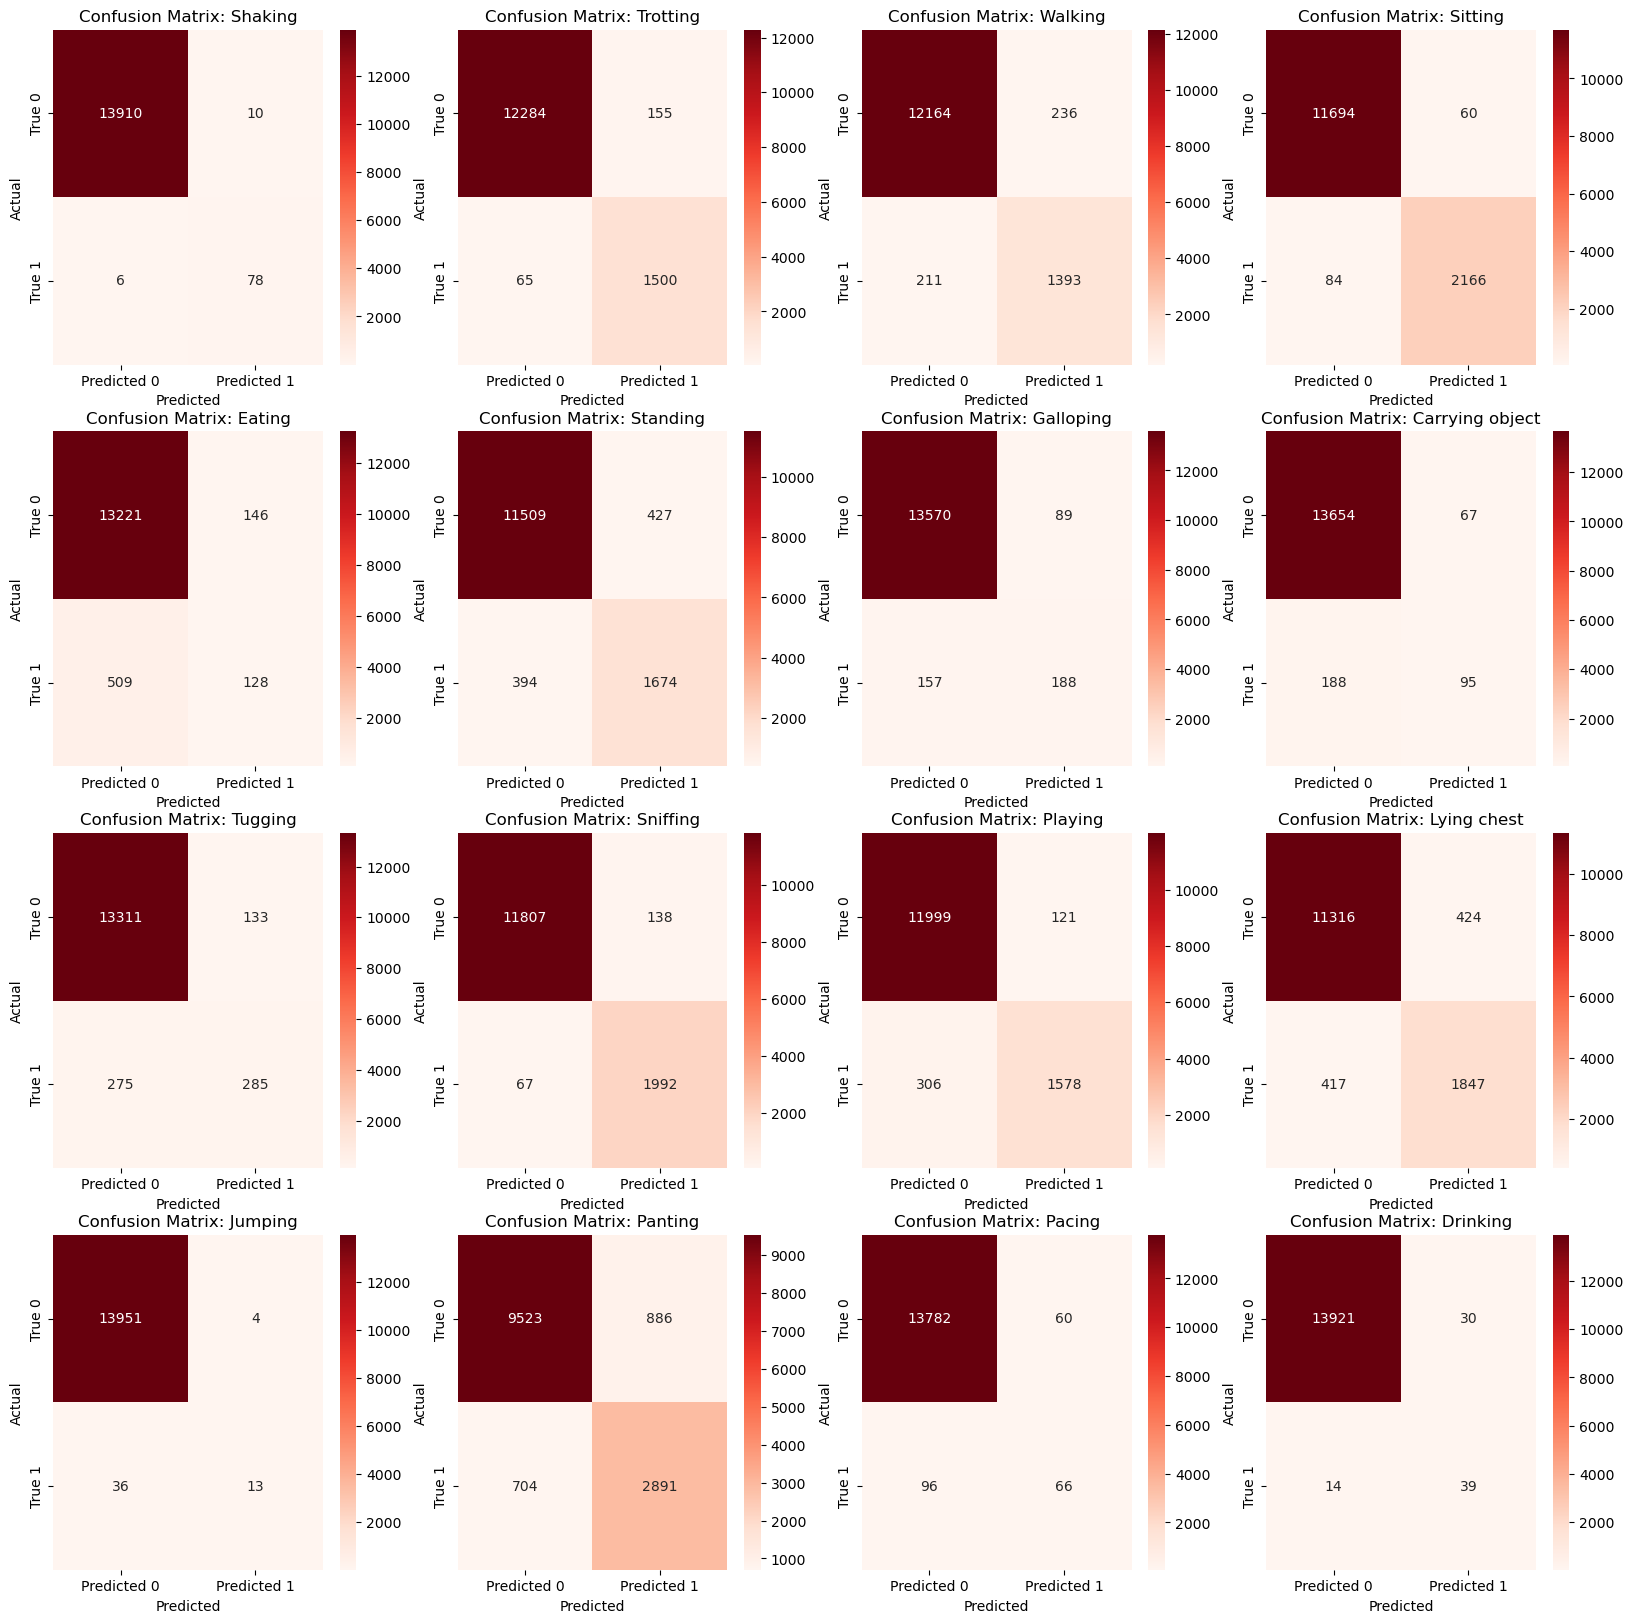

In [ ]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Create multilabel confusion matrix (array)
cm =multilabel_confusion_matrix(y_test, y_pred)
labels = ["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]

total_labels = len(labels)

# Plot subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

# Plot the confusion matrix in each subplot
for label in range(total_labels):
    title = labels[label]
    sns.heatmap(cm[label], annot=True, cmap= "Reds", ax=ax[label], xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
    ax[label].set_title(f"Confusion Matrix: {title}")
    ax[label].set_ylabel("Actual")
    ax[label].set_xlabel("Predicted")

plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Create a list of columns including the column names of this model specific features
X_train_iblr.shape
columns = list(X_train.columns)

for column in y_train.columns:
    column = "knn_" + column
    columns.append(column)

# Use the permutation importance function
permutation_imp = permutation_importance(best_chain_model_IBLR, X_train_iblr, y_train, n_repeats = 5, n_jobs=-1)
# Create DataFrame
permutation_imp = pd.DataFrame({"feature" : columns,
                                "importance": permutation_imp.importances_mean})
# Sort DataFrame
permutation_imp = permutation_imp.sort_values(by= "importance", ascending=False)

print(permutation_imp)

                       feature  importance
10             PCA_ABack__pca0    0.198554
13             PCA_ABack__pca3    0.196836
11             PCA_ABack__pca1    0.194787
57                 knn_Panting    0.184897
15             PCA_GBack__pca0    0.172704
33                mean_ABack_y    0.162047
47                 knn_Sitting    0.151768
46                 knn_Walking    0.145489
53                knn_Sniffing    0.142271
45                knn_Trotting    0.142093
49                knn_Standing    0.126111
54                 knn_Playing    0.116069
34                mean_ABack_z    0.103341
41           sum_std_dev_GBack    0.099061
40           sum_std_dev_ABack    0.098338
32                mean_ABack_x    0.081789
21                mean_ANeck_y    0.065584
55             knn_Lying chest    0.053551
12             PCA_ABack__pca2    0.052793
38     positional_offset_ABack    0.052315
48                  knn_Eating    0.038984
39     positional_offset_GBack    0.036838
52         

In [ ]:
# Multilabel prediction count
# Sum binary values of label predictions for each row
label_counts = np.sum(y_pred, axis=1)
# Create DataFrame
count_label_predictions = pd.DataFrame(label_counts, columns=['predicted_label_count'])
# Count how many times multiple predictions occur
summary_label_pred = count_label_predictions['predicted_label_count'].value_counts().sort_index()

print(summary_label_pred)

predicted_label_count
0.0      45
1.0    9170
2.0    4619
3.0     169
4.0       1
Name: count, dtype: int64


# **CDN(RF)**

In [ ]:
# Without undersampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

y_train = np.array(y_train)
y_val = np.array(y_val)
num_labels = 16

#One Random Forest classifier for each label
#Grid search for each classifier
best_accuracy = 0
classifiers = []
param_grid = {
    "n_estimators": [20, 40, 60],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt","log2"],
    "class_weight": [None, "balanced"]}

for label in range(num_labels):
    rf_label = RandomForestClassifier(random_state=5)
    grid_search_cv = GridSearchCV(rf_label, param_grid=param_grid, cv=3, scoring= "accuracy", n_jobs=-1)
    grid_search_cv.fit(X_train, y_train[:, label])
    classifiers.append(grid_search_cv.best_estimator_)
    print(f"Optimal configuration for {label}: {grid_search_cv.best_params_}")

# Create empty array
y_pred_train = np.zeros_like(y_train)
y_pred_val = np.zeros_like(y_val)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_train)
    y_pred_val[:, label] = classifiers[label].predict(X_val)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_train, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_train[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_val_augmented = np.hstack((X_val, y_pred_val))
        y_pred_val[:, label] = classifiers[label].predict(X_val_augmented)

# Evaluation on y-val
accuracy = accuracy_score(y_val, y_pred_val)
macro_f1 = f1_score(y_val, y_pred_val, average="macro")
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation macro F1: {macro_f1:.3f}')


Optimal configuration for 0: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 1: {'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 2: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 3: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 4: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 5: {'class_weight': None, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 6:

In [ ]:
# With undersampling 7000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV

y_undersample_7000 = np.array(y_undersample_7000)
y_val = np.array(y_val)
num_labels = 16

#One Random Forest classifier for each label
#Grid search for each classifier
best_accuracy = 0
classifiers = []
param_grid = {
    "n_estimators": [20, 40, 60],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt","log2"],
    "class_weight": [None, "balanced"]}

for label in range(num_labels):
    rf_label = RandomForestClassifier(random_state=5)
    grid_search_cv = GridSearchCV(rf_label, param_grid=param_grid, cv=3, scoring= "accuracy", n_jobs=-1)
    grid_search_cv.fit(X_undersample_7000, y_undersample_7000[:, label])
    classifiers.append(grid_search_cv.best_estimator_)
    print(f"Optimal configuration for {label}: {grid_search_cv.best_params_}")

# Create empty array
y_pred_train = np.zeros_like(y_undersample_7000)
y_pred_val = np.zeros_like(y_val)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_undersample_7000)
    y_pred_val[:, label] = classifiers[label].predict(X_val)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_undersample_7000, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_undersample_7000[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_val_augmented = np.hstack((X_val, y_pred_val))
        y_pred_val[:, label] = classifiers[label].predict(X_val_augmented)

# Evaluation on y-val
accuracy = accuracy_score(y_val, y_pred_val)
macro_f1 = f1_score(y_val, y_pred_val, average="macro")
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation macro F1: {macro_f1:.3f}')

Optimal configuration for 0: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 1: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 2: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 3: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 4: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 5: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 6: {'cla

In [ ]:
# With undersampling 5000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV

y_undersample_5000 = np.array(y_undersample_5000)
y_val = np.array(y_val)
num_labels = 16

#One Random Forest classifier for each label
#Grid search for each classifier
best_accuracy = 0
classifiers = []
param_grid = {
    "n_estimators": [20, 40, 60],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt","log2"],
    "class_weight": [None, "balanced"]}

for label in range(num_labels):
    rf_label = RandomForestClassifier(random_state=5)
    grid_search_cv = GridSearchCV(rf_label, param_grid=param_grid, cv=3, scoring= "accuracy", n_jobs=-1)
    grid_search_cv.fit(X_undersample_5000, y_undersample_5000[:, label])
    classifiers.append(grid_search_cv.best_estimator_)
    print(f"Optimal configuration for {label}: {grid_search_cv.best_params_}")

# Create empty array
y_pred_train = np.zeros_like(y_undersample_5000)
y_pred_val = np.zeros_like(y_val)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_undersample_5000)
    y_pred_val[:, label] = classifiers[label].predict(X_val)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_undersample_5000, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_undersample_5000[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_val_augmented = np.hstack((X_val, y_pred_val))
        y_pred_val[:, label] = classifiers[label].predict(X_val_augmented)

# Evaluation on y-val
accuracy = accuracy_score(y_val, y_pred_val)
macro_f1 = f1_score(y_val, y_pred_val, average="macro")
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation macro F1: {macro_f1:.3f}')

Optimal configuration for 0: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 1: {'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 2: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 3: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 4: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 5: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration 

In [ ]:
# With undersampling 3000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV

y_undersample_3000 = np.array(y_undersample_3000)
y_val = np.array(y_val)
num_labels = 16

#One Random Forest classifier for each label
#Grid search for each classifier
best_accuracy = 0
classifiers = []
param_grid = {
    "n_estimators": [20, 40, 60],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt","log2"],
    "class_weight": [None, "balanced"]}

for label in range(num_labels):
    rf_label = RandomForestClassifier(random_state=5)
    grid_search_cv = GridSearchCV(rf_label, param_grid=param_grid, cv=3, scoring= "accuracy", n_jobs=-1)
    grid_search_cv.fit(X_undersample_3000, y_undersample_3000[:, label])
    classifiers.append(grid_search_cv.best_estimator_)
    print(f"Optimal configuration for {label}: {grid_search_cv.best_params_}")

# create empty array
y_pred_train = np.zeros_like(y_undersample_3000)
y_pred_val = np.zeros_like(y_val)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_undersample_3000)
    y_pred_val[:, label] = classifiers[label].predict(X_val)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_undersample_3000, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_undersample_3000[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_val_augmented = np.hstack((X_val, y_pred_val))
        y_pred_val[:, label] = classifiers[label].predict(X_val_augmented)

# Evaluation on y-val
accuracy = accuracy_score(y_val, y_pred_val)
macro_f1 = f1_score(y_val, y_pred_val, average="macro")
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation macro F1: {macro_f1:.3f}')

Optimal configuration for 0: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 1: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 2: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 3: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 4: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 5: {'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration 

In [ ]:
# With undersampling 1000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV

y_undersample_1000 = np.array(y_undersample_1000)
y_val = np.array(y_val)
num_labels = 16

#One Random Forest classifier for each label
#Grid search for each classifier
best_accuracy = 0
classifiers = []
param_grid = {
    "n_estimators": [20, 40, 60],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt","log2"],
    "class_weight": [None, "balanced"]}

for label in range(num_labels):
    rf_label = RandomForestClassifier(random_state=5)
    grid_search_cv = GridSearchCV(rf_label, param_grid=param_grid, cv=3, scoring= "accuracy", n_jobs=-1)
    grid_search_cv.fit(X_undersample_1000, y_undersample_1000[:, label])
    classifiers.append(grid_search_cv.best_estimator_)
    print(f"Optimal configuration for {label}: {grid_search_cv.best_params_}")

# create empty array
y_pred_train = np.zeros_like(y_undersample_1000)
y_pred_val = np.zeros_like(y_val)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_undersample_1000)
    y_pred_val[:, label] = classifiers[label].predict(X_val)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_undersample_1000, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_undersample_1000[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_val_augmented = np.hstack((X_val, y_pred_val))
        y_pred_val[:, label] = classifiers[label].predict(X_val_augmented)
# Evaluation on y-val
accuracy = accuracy_score(y_val, y_pred_val)
macro_f1 = f1_score(y_val, y_pred_val, average="macro")
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation macro F1: {macro_f1:.3f}')

Optimal configuration for 0: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 1: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 2: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration for 3: {'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Optimal configuration for 4: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Optimal configuration for 5: {'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Optimal configuration 

In [ ]:
# best model
# With undersampling = 1000
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score

y_train = np.array(y_train)
y_test = np.array(y_test)
num_labels = 16

#best configuration of random forest classifiers
classifiers = []
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=40, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=40, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=20, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features="sqrt"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=40, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = "balanced", n_jobs=-1, random_state=5, n_estimators=60, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features="log2"))
classifiers.append(RandomForestClassifier(class_weight = None, n_jobs=-1, random_state=5, n_estimators=60, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features="log2"))

for label in range(num_labels):
    classifiers[label].fit(X_undersample_1000, y_undersample_1000[:, label])


# Create empty array
y_pred_train = np.zeros_like(y_undersample_1000)
y_pred_test = np.zeros_like(y_test)
# Update empty array with first prediction of each model
for label in range(num_labels):
    y_pred_train[:, label] = classifiers[label].predict(X_undersample_1000)
    y_pred_test[:, label] = classifiers[label].predict(X_test)

# Gibbs sampling iterations
iterations = 10
for iteration in range(iterations):
    for label in range(num_labels):
        # Update train predictions
        X_train_augmented = np.hstack((X_undersample_1000, y_pred_train))
        classifiers[label].fit(X_train_augmented, y_undersample_1000[:, label])
        y_pred_train[:, label] = classifiers[label].predict(X_train_augmented)

        # Update test predictions
        X_test_augmented = np.hstack((X_test, y_pred_test))
        y_pred_test[:, label] = classifiers[label].predict(X_test_augmented)

# Evaluation on y-test
print(classification_report(y_test, y_pred_test, target_names=["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]))

hamming = hamming_loss(y_test, y_pred_test)
print(f'Hamming Loss: {hamming:.2f}')

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

                 precision    recall  f1-score   support

        Shaking       0.93      0.94      0.93        84
       Trotting       0.95      0.88      0.91      1565
        Walking       0.92      0.90      0.91      1604
        Sitting       0.96      0.95      0.96      2250
         Eating       0.47      0.27      0.35       637
       Standing       0.81      0.83      0.82      2068
      Galloping       0.48      0.80      0.60       345
Carrying object       0.37      0.53      0.44       283
        Tugging       0.63      0.32      0.42       560
       Sniffing       0.96      0.95      0.95      2059
        Playing       0.91      0.87      0.89      1884
    Lying chest       0.92      0.64      0.76      2264
        Jumping       0.67      0.08      0.15        49
        Panting       0.82      0.80      0.81      3595
         Pacing       0.65      0.40      0.49       162
       Drinking       0.84      0.68      0.75        53

      micro avg       0.86   

C:\Users\willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create empty list
importance_DT_list = []

# Create list of column names including model specific columns
columns = list(X_undersample_1000.columns)
columns += ["pred_Shaking", "pred_Trotting", "pred_Walking", "pred_Sitting", "pred_Eating", "pred_Standing", "pred_Galloping", "pred_Carrying object", "pred_Tugging", "pred_Sniffing", "pred_Playing", "pred_Lying chest", "pred_Jumping", "pred_Panting", "pred_Pacing", "pred_Drinking"]
# Calculate the feature importance for each classifier
for label in range(num_labels):
    importances_DT = classifiers[label].feature_importances_
    # Create DataFrame of the feature importance of each classifier
    importance_DT = pd.DataFrame({
        'Feature': columns,
        'Importance': importances_DT})
    # Add DataFrame to the list
    importance_DT_list.append(importance_DT)

# Concatenate all of the DataFrames to each other
importance_DT_total = pd.concat(importance_DT_list, axis=1)
# Select only the first feature column (All dataframes are in same order)
features = importance_DT_total.iloc[:,0]
# Average all the importance values of each feature of each classifier
average_importance_DT = importance_DT_total.mean(axis=1)
# Create Final dataframe including features and corresponding average importance value
importance_DT_total = pd.concat([features, average_importance_DT], axis=1)
# Sort DataFrame
importance_DT_total = importance_DT_total.sort_values(by= 0, ascending=False)
print(importance_DT_total)

                       Feature         0
41           sum_std_dev_GBack  0.065839
40           sum_std_dev_ABack  0.055376
54                pred_Playing  0.046766
52                pred_Tugging  0.041723
10             PCA_ABack__pca0  0.039755
33                mean_ABack_y  0.038602
49               pred_Standing  0.037215
15             PCA_GBack__pca0  0.037036
34                mean_ABack_z  0.035191
57                pred_Panting  0.032827
55            pred_Lying chest  0.032687
11             PCA_ABack__pca1  0.031688
13             PCA_ABack__pca3  0.031398
56                pred_Jumping  0.030883
14             PCA_ABack__pca4  0.029926
45               pred_Trotting  0.026693
59               pred_Drinking  0.024303
48                 pred_Eating  0.023684
50              pred_Galloping  0.023585
51        pred_Carrying object  0.022693
58                 pred_Pacing  0.022392
53               pred_Sniffing  0.021820
17             PCA_GBack__pca2  0.019580
47              

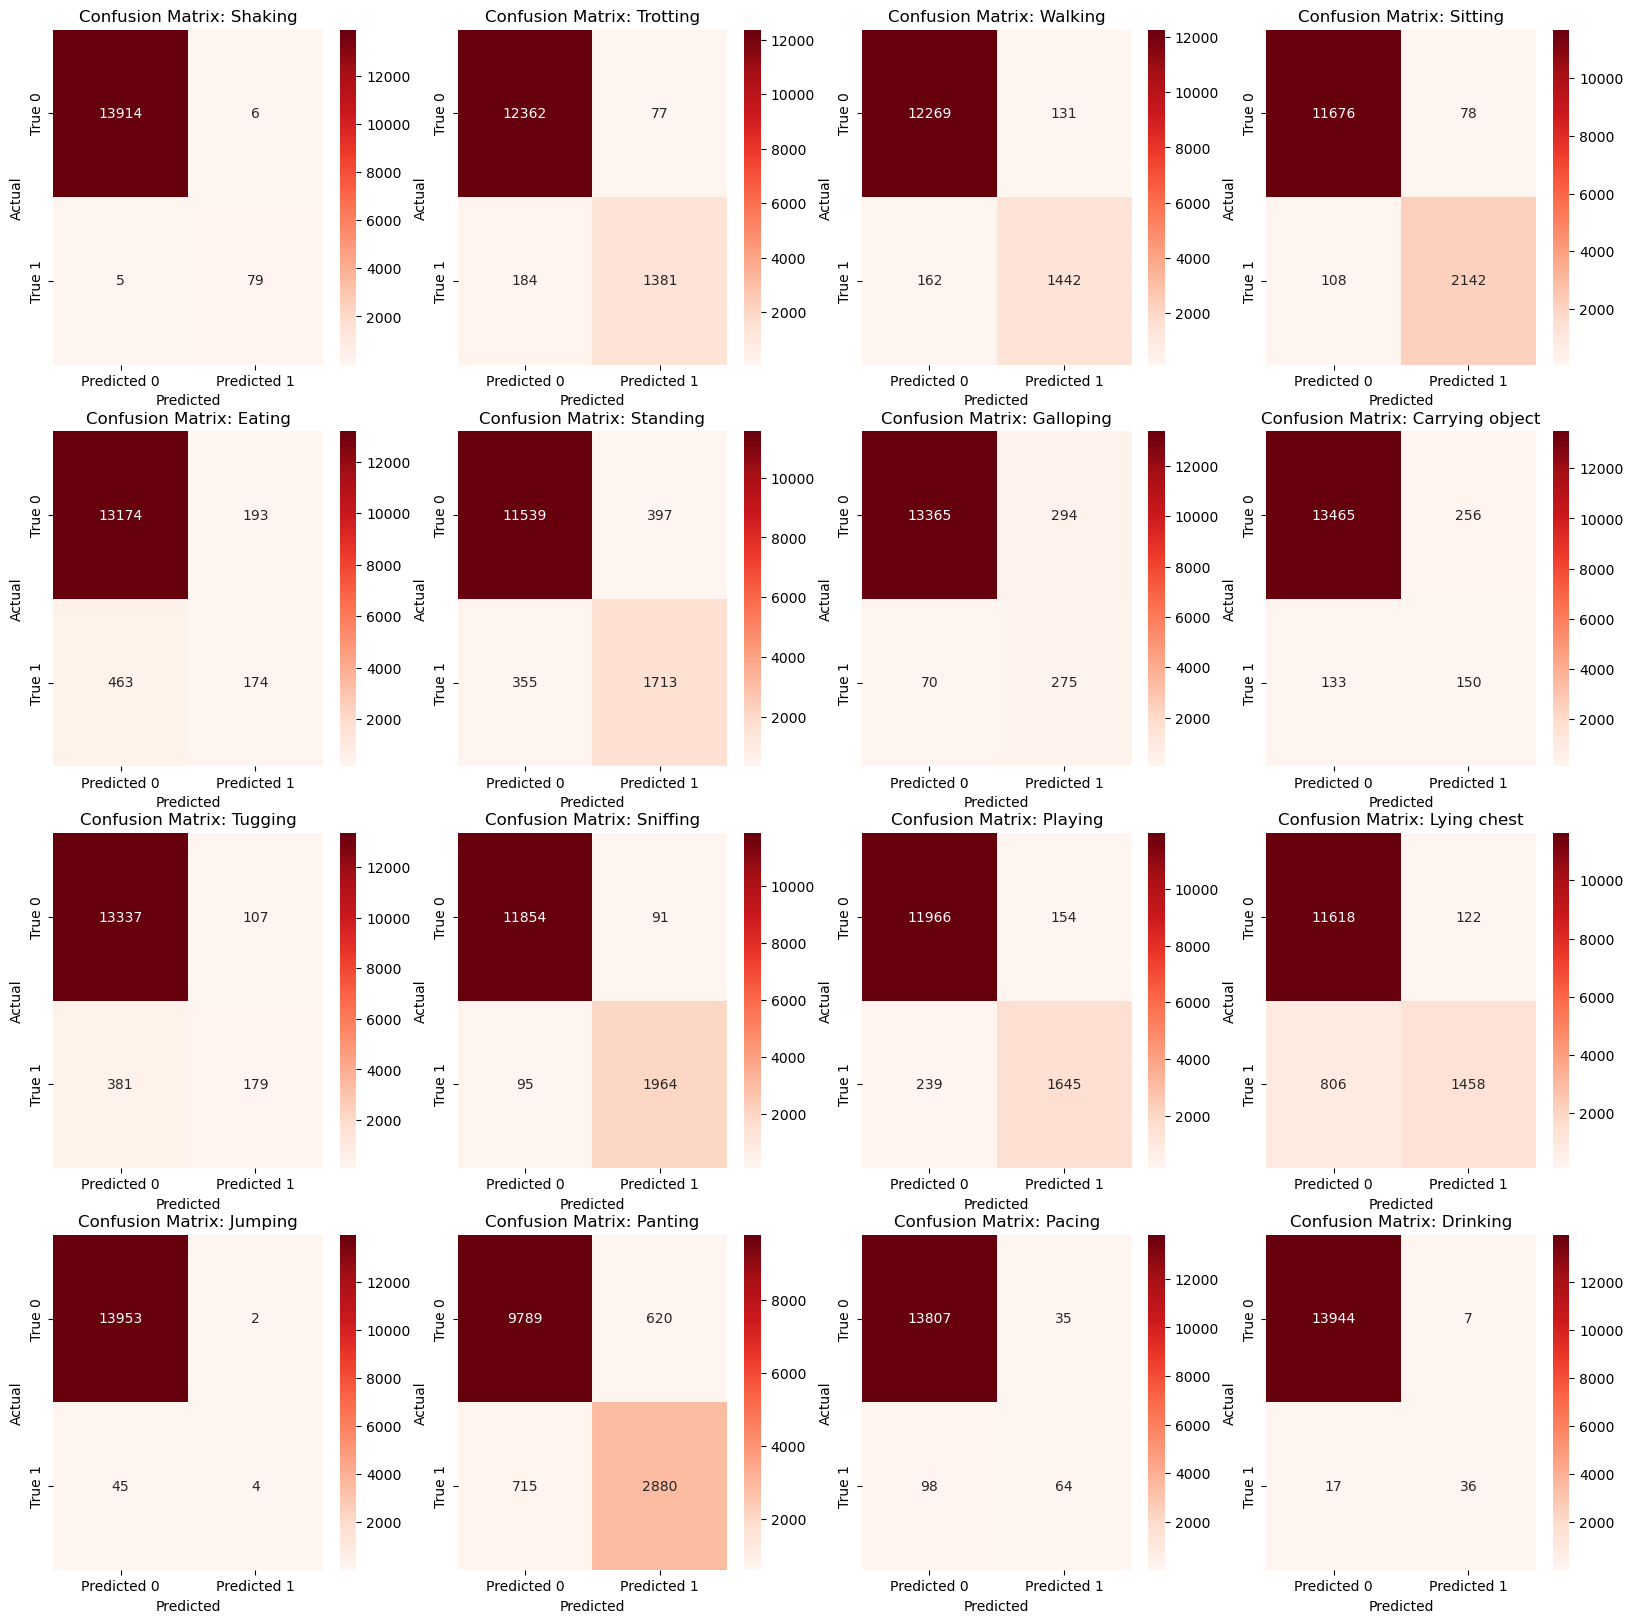

In [ ]:
# multilabel confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Create multilabel confusion matrix (array)
cm =multilabel_confusion_matrix(y_test, y_pred_test)
labels = ["Shaking", "Trotting", "Walking", "Sitting", "Eating", "Standing", "Galloping", "Carrying object", "Tugging", "Sniffing", "Playing", "Lying chest", "Jumping", "Panting", "Pacing", "Drinking"]

total_labels = len(labels)

# plot subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

# Plot confusion matrix in each subplot
for label in range(total_labels):
    title = labels[label]
    sns.heatmap(cm[label], annot=True, cmap= "Reds", ax=ax[label], xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
    ax[label].set_title(f"Confusion Matrix: {title}")
    ax[label].set_ylabel("Actual")
    ax[label].set_xlabel("Predicted")

plt.show()

In [ ]:
# Multilabel prediction count
# Sum binary values if kabel prediction for each row
label_counts = np.sum(y_pred_test, axis=1)
# Create DataFrame
count_label_predictions = pd.DataFrame(label_counts, columns=['predicted_label_count'])
# Count how many times multiple predictions occur
summary_label_pred = count_label_predictions['predicted_label_count'].value_counts().sort_index()

print(summary_label_pred)

predicted_label_count
0     903
1    8468
2    4211
3     422
Name: count, dtype: int64
